In [1]:
%pip install pandas scikit-learn matplotlib seaborn
%pip install openpyxl
%pip install --upgrade pip
%pip install plotly ipywidgets pandas
%pip install streamlit plotly pandas

# Import necessary libraries
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%pip install openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

warnings.filterwarnings('ignore')
# Set random seed for reproducibility           
RANDOM_SEED = 42
# Set the style of seaborn
sns.set(style="whitegrid")
# Set the figure size for all plots
plt.figure(figsize=(10, 6))
# Set the default color palette for seaborn
sns.set_palette("deep")
# Set the default font size for all plots
plt.rcParams['font.size'] = 12
# Set the default figure size for all plots
plt.rcParams['figure.figsize'] = (10, 6)
# Set the default figure dpi for all plots
plt.rcParams['figure.dpi'] = 100
# Set the default figure face color for all plots
plt.rcParams['figure.facecolor'] = 'white'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<Figure size 1000x600 with 0 Axes>

In [2]:
# --------- Dados estruturados para os 19 subníveis ---------
dados = {
    "Subniveis": ["8E", "8D", "8C", "8B", "8A", "7B", "7A", "6B", "6A", "5A",
                  "4B", "4A", "3A", "2B", "2A", "1D", "1C", "1B", "1A"],
    "Espessura": [3.5, 5.5, 5.5, 3.0, 4.5, 4.5, 6.5, 7.5, 8.0, 8.0,
                  7.0, 5.5, 6.5, 6.5, 5.5, 6.0, 4.0, 1.5, 2.5],
    "N. AMOSTRAS": [7, 9, 8, 17, 20, 3, 13, 15, 4, 11,
                    52, 25, 14, 25, 8, 14, 7, 10, 8],
    "MOA-NF": [29, 27, 62, 54, 70, 64, 71, 78, 74, 62,
               75, 89, 84, 89, 79, 72, 71, 68, 69],
    "OP-AL": [4, 10, 3, 7, 3, 1, 2, 4, 3, 4,
              2, 1, 0, 1, 0, 1, 2, 2, 3],
    "OP-EQUI": [2, 3, 1, 4, 1, 0, 0, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 0],
    "2010": [6, 12, 12, 5, 9, 92, 30, 15, 18, 51,
             125, 75, 57, 44, 20, 20, 6, 0, 0],
    "2010.1": [10, 25, 25, 8, 18, 100, 71, 50, 54, 166,
               150, 91, 113, 52, 40, 64, 45, 10, 0],
    "Fe2O3": [None, None, None, None, None, None, 7.06, None, 6.66, 6.41,
              None, 5.23, 7.41, 5.99, 6.89, 5.78, 5.25, 5.52, 4.94],
    "U/Th": [None, None, None, None, None, None, 2.06, None, 1.98, 1.82,
             None, 1.81, 1.66, 1.35, 1.28, 1.11, 1.17, 1.51, 1.48],
    "Al2O3": [None, None, None, None, None, None, 14.13, None, 14.31, 13.69,
              None, 14.10, 13.62, 15.01, 14.65, 13.95, 14.89, 13.38, 13.12],
    "TiO2": [None, None, None, None, None, None, 0.57, None, 0.55, 0.59,
             None, 0.61, 0.60, 0.61, 0.61, 0.62, 0.64, 0.61, 0.63],
    "MOA": [None, None, None, None, None, None, 327, None, 286, 248,
            None, 258, 289, 286, 338, 321, 266, 251, 190],
    "TS": [None, None, None, None, None, None, 1.49, None, 1.96, 2.73,
           None, 4.54, 1.71, 1.24, 1.72, 3.98, 3.67, 1.73, 2.62],
    "TOC": [None, None, None, None, None, None, 11.93, None, 12.11, 11.70,
            None, 12.01, 13.05, 8.79, 7.69, 5.73, 7.42, 12.41, 12.97],
    "TN": [None, None, None, None, None, None, 0.43, None, 0.46, 0.44,
           None, 0.43, 0.54, 0.32, 0.29, 0.18, 0.26, 0.52, 0.54]
}
# Create a DataFrame from the dictionary
df = pd.DataFrame(dados)
# Display the first few rows of the DataFrame
df.head()
# Display the DataFrame information
df.info()
# Display the DataFrame statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Subniveis    19 non-null     object 
 1   Espessura    19 non-null     float64
 2   N. AMOSTRAS  19 non-null     int64  
 3   MOA-NF       19 non-null     int64  
 4   OP-AL        19 non-null     int64  
 5   OP-EQUI      19 non-null     int64  
 6   2010         19 non-null     int64  
 7   2010.1       19 non-null     int64  
 8   Fe2O3        11 non-null     float64
 9   U/Th         11 non-null     float64
 10  Al2O3        11 non-null     float64
 11  TiO2         11 non-null     float64
 12  MOA          11 non-null     float64
 13  TS           11 non-null     float64
 14  TOC          11 non-null     float64
 15  TN           11 non-null     float64
dtypes: float64(9), int64(6), object(1)
memory usage: 2.5+ KB


,Espessura,N. AMOSTRAS,MOA-NF,OP-AL,OP-EQUI,2010,2010.1,Fe2O3,U/Th,Al2O3,TiO2,MOA,TS,TOC,TN
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,5.342105,14.210526,67.736842,2.789474,0.684211,31.421053,57.473684,6.103636,1.566364,14.077273,0.603636,278.181818,2.490000,10.528182,0.400909
std,1.841291,11.078402,16.612720,2.417045,1.157230,34.525861,47.763734,0.833502,0.324354,0.607768,0.025796,42.444831,1.118562,2.601141,0.121281
min,1.500000,3.000000,27.000000,0.000000,0.000000,0.000000,0.000000,4.940000,1.110000,13.120000,0.550000,190.000000,1.240000,5.730000,0.180000
25%,4.250000,8.000000,63.000000,1.000000,0.000000,7.500000,21.500000,5.385000,1.315000,13.655000,0.595000,254.500000,1.715000,8.240000,0.305000
50%,5.500000,11.000000,71.000000,2.000000,0.000000,18.000000,50.000000,5.990000,1.510000,14.100000,0.610000,286.000000,1.960000,11.930000,0.430000
75%,6.500000,16.000000,76.500000,3.500000,1.000000,47.500000,81.000000,6.775000,1.815000,14.480000,0.615000,305.000000,3.200000,12.260000,0.490000
max,8.000000,52.000000,89.000000,10.000000,4.000000,125.000000,166.000000,7.410000,2.060000,15.010000,0.640000,338.000000,4.540000,13.050000,0.540000


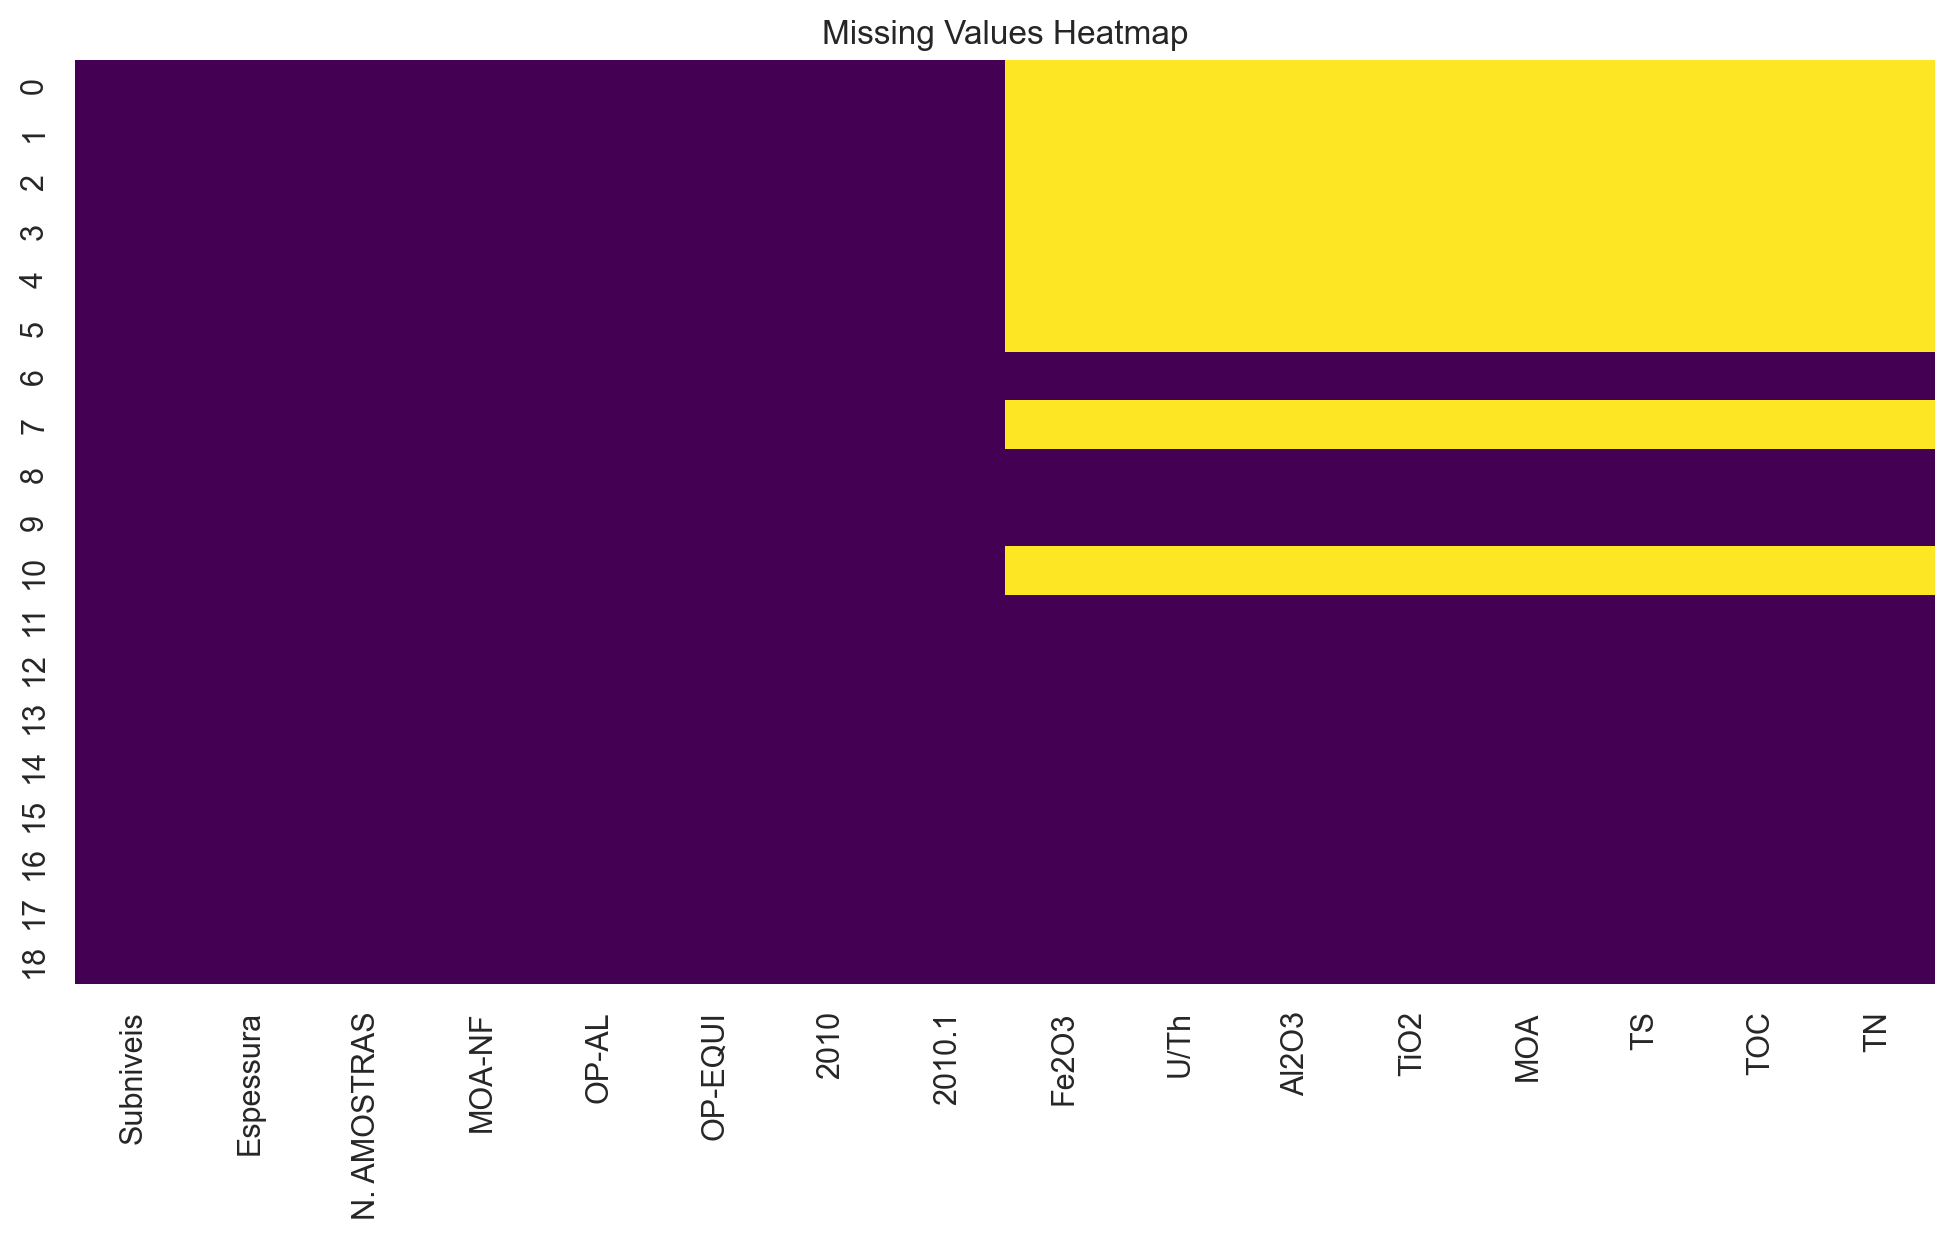

In [3]:
# Check for missing values
missing_values = df.isnull().sum()  
# Display the missing values
missing_values[missing_values > 0]
# Visualize the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap') 
plt.show()

In [4]:
# 1. Estimar os valores ausentes usando imputação simples nas colunas preditoras
df_copy = df.copy()

# Selecionar colunas preditoras (X) e alvos (y)
colunas_X = ["Espessura", "N. AMOSTRAS", "MOA-NF", "OP-AL", "OP-EQUI", "2010", "2010.1"]
colunas_y = ["Fe2O3", "U/Th", "Al2O3", "TiO2", "MOA", "TS", "TOC", "TN"]

X = df_copy[colunas_X]
y = df_copy[colunas_y]

# Separar em treino e teste (apenas para exemplo, pois temos poucos dados)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=RANDOM_SEED)

# Imputação dos valores faltantes nas colunas preditoras
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Criar DataFrames dos dados imputados
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=colunas_X, index=X_train.index)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=colunas_X, index=X_test.index)
# Imputação dos valores faltantes nas colunas alvo
imputer_y = SimpleImputer(strategy='mean')
imputer_y.fit(y_train)
y_train_imputed = imputer_y.transform(y_train)
y_test_imputed = imputer_y.transform(y_test)
# Criar DataFrames dos dados imputados
y_train_imputed_df = pd.DataFrame(y_train_imputed, columns=colunas_y, index=y_train.index)
y_test_imputed_df = pd.DataFrame(y_test_imputed, columns=colunas_y, index=y_test.index)
# Exibir os dados imputados
print("Dados imputados de treino:")
print(X_train_imputed_df.head())
print("Dados imputados de teste:")
print(X_test_imputed_df.head())
# Exibir os dados imputados de treino

# Concatenar os dados imputados com as variáveis alvo originais
df_train_imputed = pd.concat([X_train_imputed_df, y_train], axis=1)
df_test_imputed = pd.concat([X_test_imputed_df, y_test], axis=1)

# Ordenar pela coluna subníveis 
if "Subniveis" not in df_train_imputed.columns and "Subniveis" in df_copy.columns:
    df_train_imputed["Subniveis"] = df_copy.loc[df_train_imputed.index, "Subniveis"]
df_train_imputed = df_train_imputed.sort_values(by=["Espessura", "Subniveis"])

# Exibir as primeiras linhas do DataFrame imputado de treino
pd.set_option('display.max_rows', None)
print(df_train_imputed.head())

Dados imputados de treino:
    Espessura  N. AMOSTRAS  MOA-NF  OP-AL  OP-EQUI  2010  2010.1
2         5.5          8.0    62.0    3.0      1.0  12.0    25.0
9         8.0         11.0    62.0    4.0      0.0  51.0   166.0
18        2.5          8.0    69.0    3.0      0.0   0.0     0.0
4         4.5         20.0    70.0    3.0      1.0   9.0    18.0
12        6.5         14.0    84.0    0.0      0.0  57.0   113.0
Dados imputados de teste:
    Espessura  N. AMOSTRAS  MOA-NF  OP-AL  OP-EQUI  2010  2010.1
0         3.5          7.0    29.0    4.0      2.0   6.0    10.0
5         4.5          3.0    64.0    1.0      0.0  92.0   100.0
11        5.5         25.0    89.0    1.0      0.0  75.0    91.0
1         5.5          9.0    27.0   10.0      3.0  12.0    25.0
8         8.0          4.0    74.0    3.0      0.0  18.0    54.0
    Espessura  N. AMOSTRAS  MOA-NF  OP-AL  OP-EQUI  2010  2010.1  Fe2O3  U/Th  \
18        2.5          8.0    69.0    3.0      0.0   0.0     0.0   4.94  1.48   
4    

In [5]:
# 2. Separar parte vermelha (treinamento) e azul (predição)
dados_completos = df.dropna(subset=["Fe2O3", "U/Th", "Al2O3", "TiO2", "MOA", "TS", "TOC", "TN"])
dados_faltantes = df[df[["Fe2O3", "U/Th", "Al2O3", "TiO2", "MOA", "TS", "TOC", "TN"]].isnull().any(axis=1)]

# 3. Selecionar colunas preditoras (X) e alvos (y)
colunas_X = ["Espessura", "N. AMOSTRAS", "MOA-NF", "OP-AL", "OP-EQUI", "2010", "2010.1"]
colunas_y = ["Fe2O3", "U/Th", "Al2O3", "TiO2", "MOA", "TS", "TOC", "TN"]

X_train = dados_completos[colunas_X]
y_train = dados_completos[colunas_y]

X_pred = dados_faltantes[colunas_X]

# 4. Tratar possíveis NaNs nos dados de entrada
imputer = SimpleImputer(strategy='max' if X_train.isnull().any().any() else 'constant', fill_value=0 if X_train.isnull().any().any() else None) 	
X_train_imputed = imputer.fit_transform(X_train)

if not X_pred.empty:
	X_pred_imputed = imputer.transform(X_pred)

	# 5. Modelo preditivo multivariado
	model = RandomForestRegressor(n_estimators=10, random_state=RANDOM_SEED)
	# 5.1. Padronizar os dados de treino
	scaler = StandardScaler()
	X_train_imputed = scaler.fit_transform(X_train_imputed)
	X_pred_imputed = scaler.transform(X_pred_imputed)
	# 5.2. Treinar o modelo
	model.fit(X_train_imputed, y_train)

	# 6. Prever os valores ausentes
	y_pred = model.predict(X_pred_imputed)

	# 7. Inserir valores previstos no dataframe original
	df.loc[dados_faltantes.index, colunas_y] = y_pred
	# 7.1. Criar coluna 'Fonte' marcando origem dos dados

df["Fonte"] = "Original"
df.loc[dados_faltantes.index, "Fonte"] = "Predito"

# 8. Exportar resultado final
print(df.loc[:, ["Subniveis", "Fe2O3", "U/Th", "Al2O3", "TiO2", "MOA", "TS", "TOC", "TN"]])

df.to_excel("resultado_completo_com_fonte.xlsx", index=False)

   Subniveis  Fe2O3   U/Th   Al2O3   TiO2    MOA     TS     TOC     TN
0         8E  5.574  1.485  13.829  0.616  241.5  2.596  11.063  0.439
1         8D  5.706  1.506  13.867  0.611  249.6  2.264  11.144  0.443
2         8C  5.679  1.472  14.018  0.614  251.1  2.458  10.645  0.417
3         8B  5.553  1.573  13.582  0.611  231.0  2.503  11.963  0.480
4         8A  5.650  1.502  14.090  0.614  251.8  2.739  10.605  0.408
5         7B  5.663  1.602  13.910  0.611  256.6  3.055  11.233  0.430
6         7A  7.060  2.060  14.130  0.570  327.0  1.490  11.930  0.430
7         6B  6.251  1.513  14.346  0.594  303.8  2.594   8.935  0.322
8         6A  6.660  1.980  14.310  0.550  286.0  1.960  12.110  0.460
9         5A  6.410  1.820  13.690  0.590  248.0  2.730  11.700  0.440
10        4B  6.308  1.772  14.000  0.592  296.2  2.846  10.660  0.382
11        4A  5.230  1.810  14.100  0.610  258.0  4.540  12.010  0.430
12        3A  7.410  1.660  13.620  0.600  289.0  1.710  13.050  0.540
13    

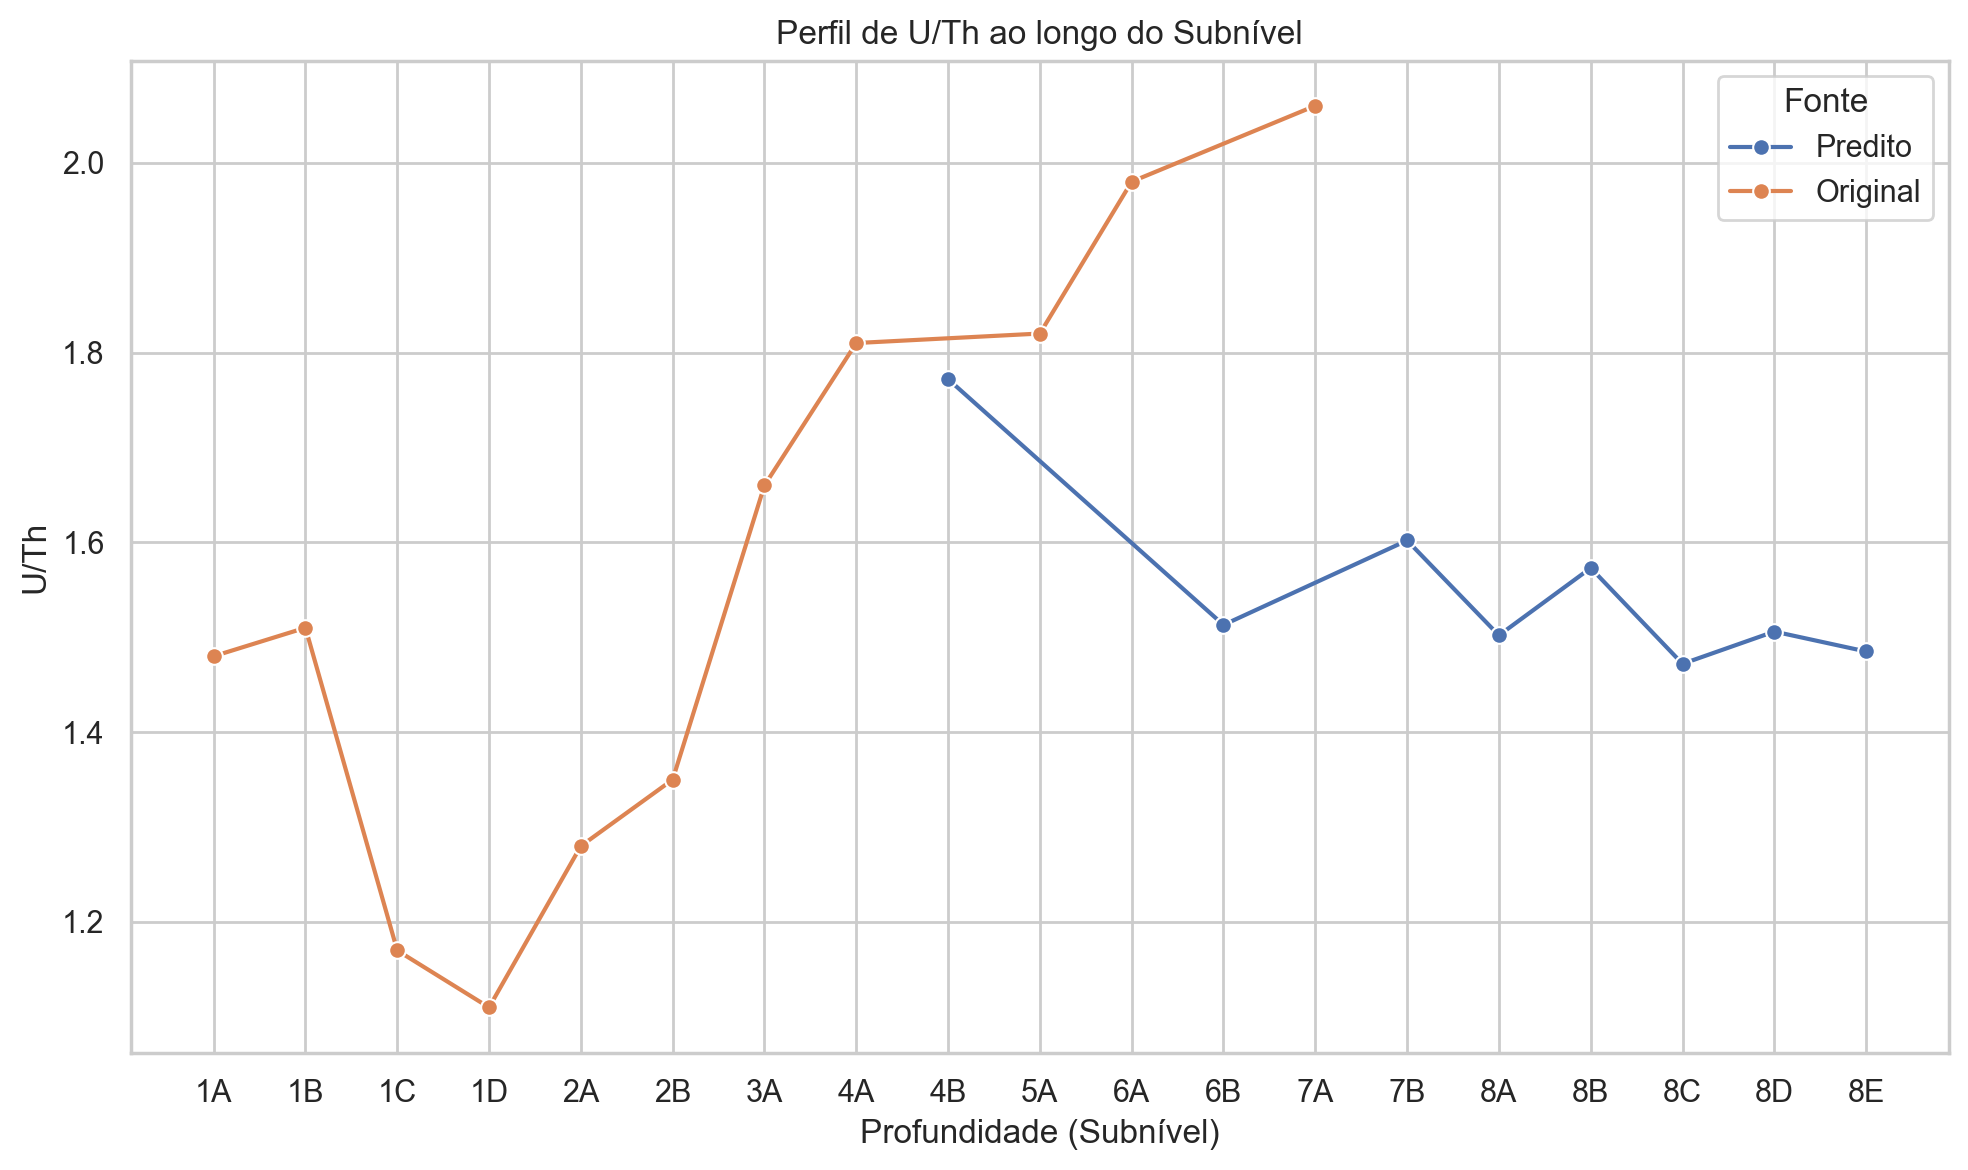

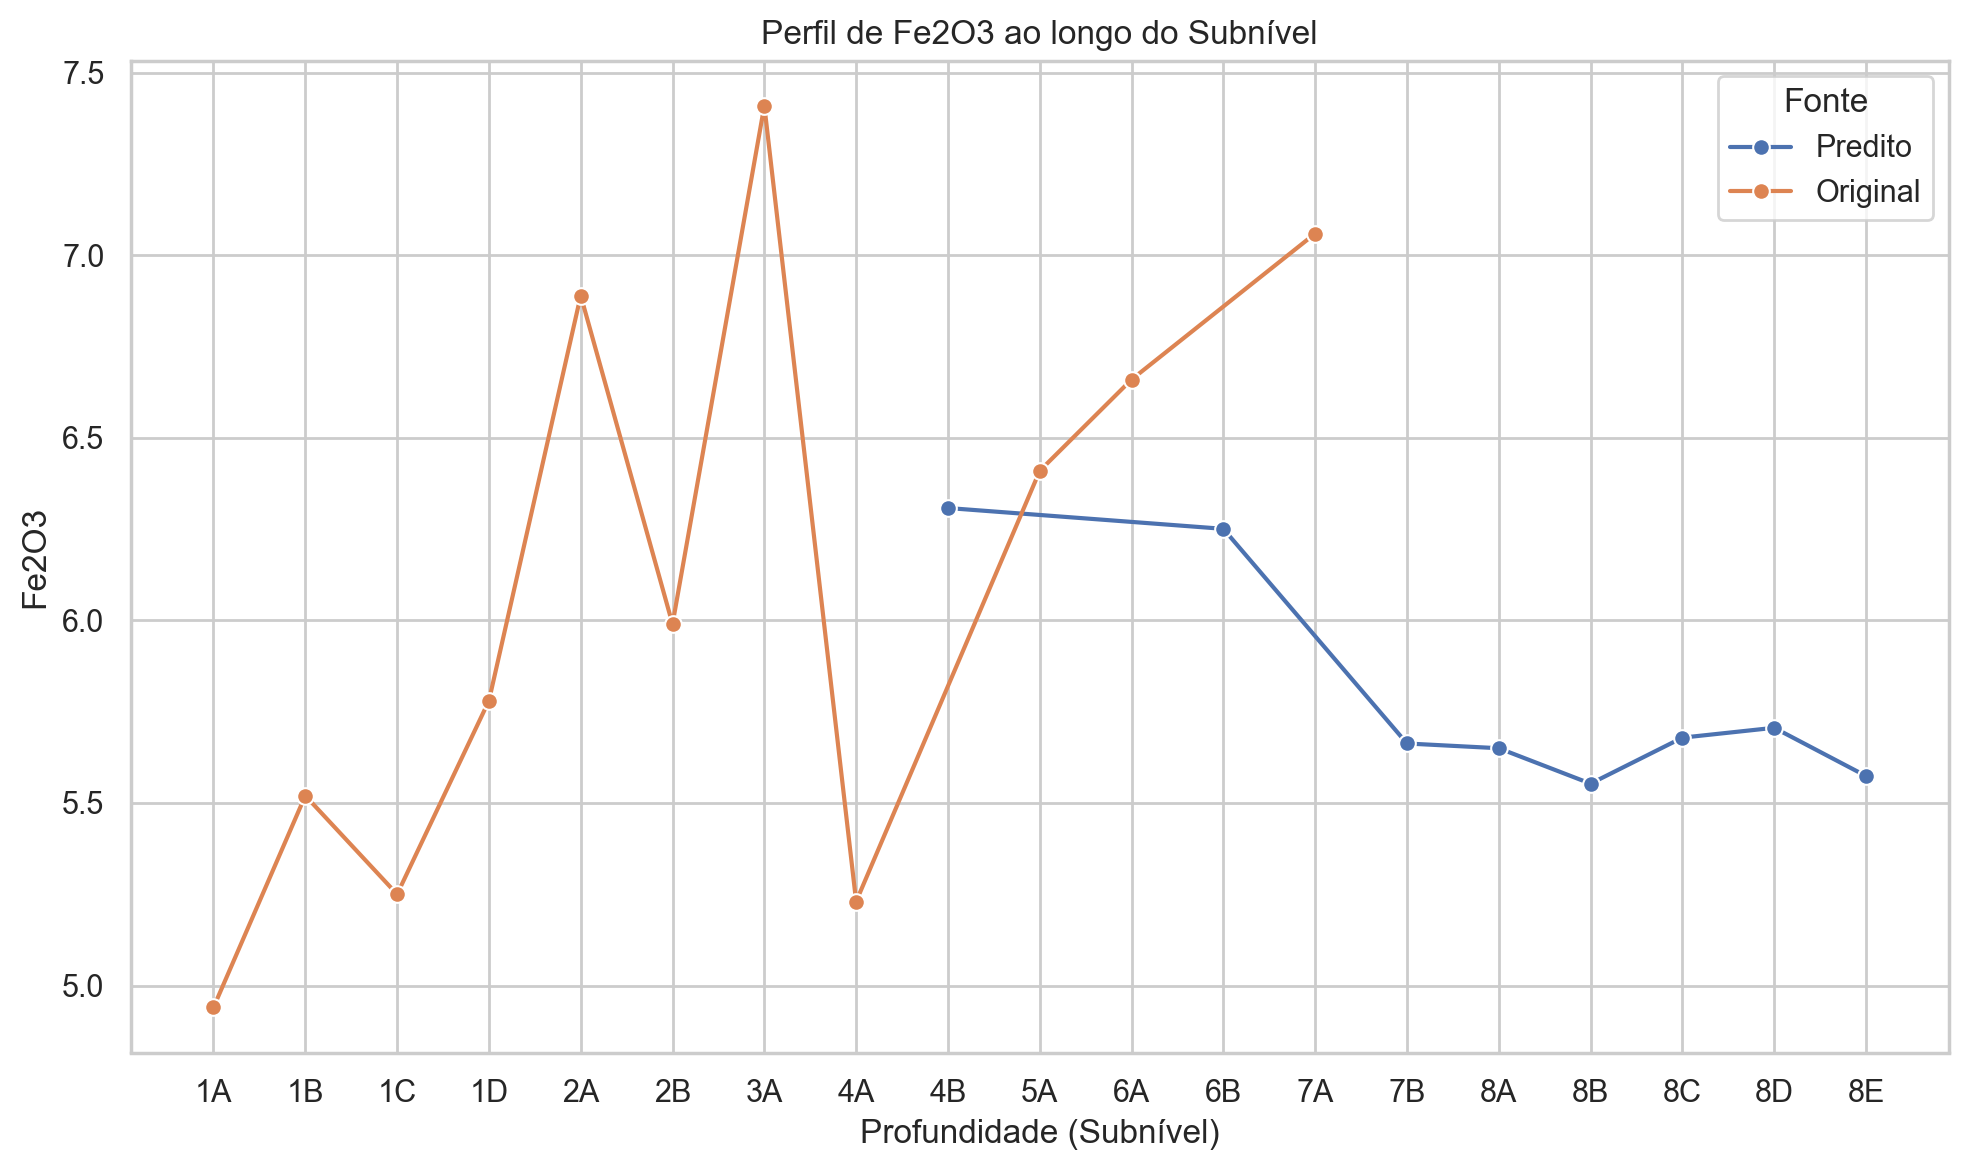

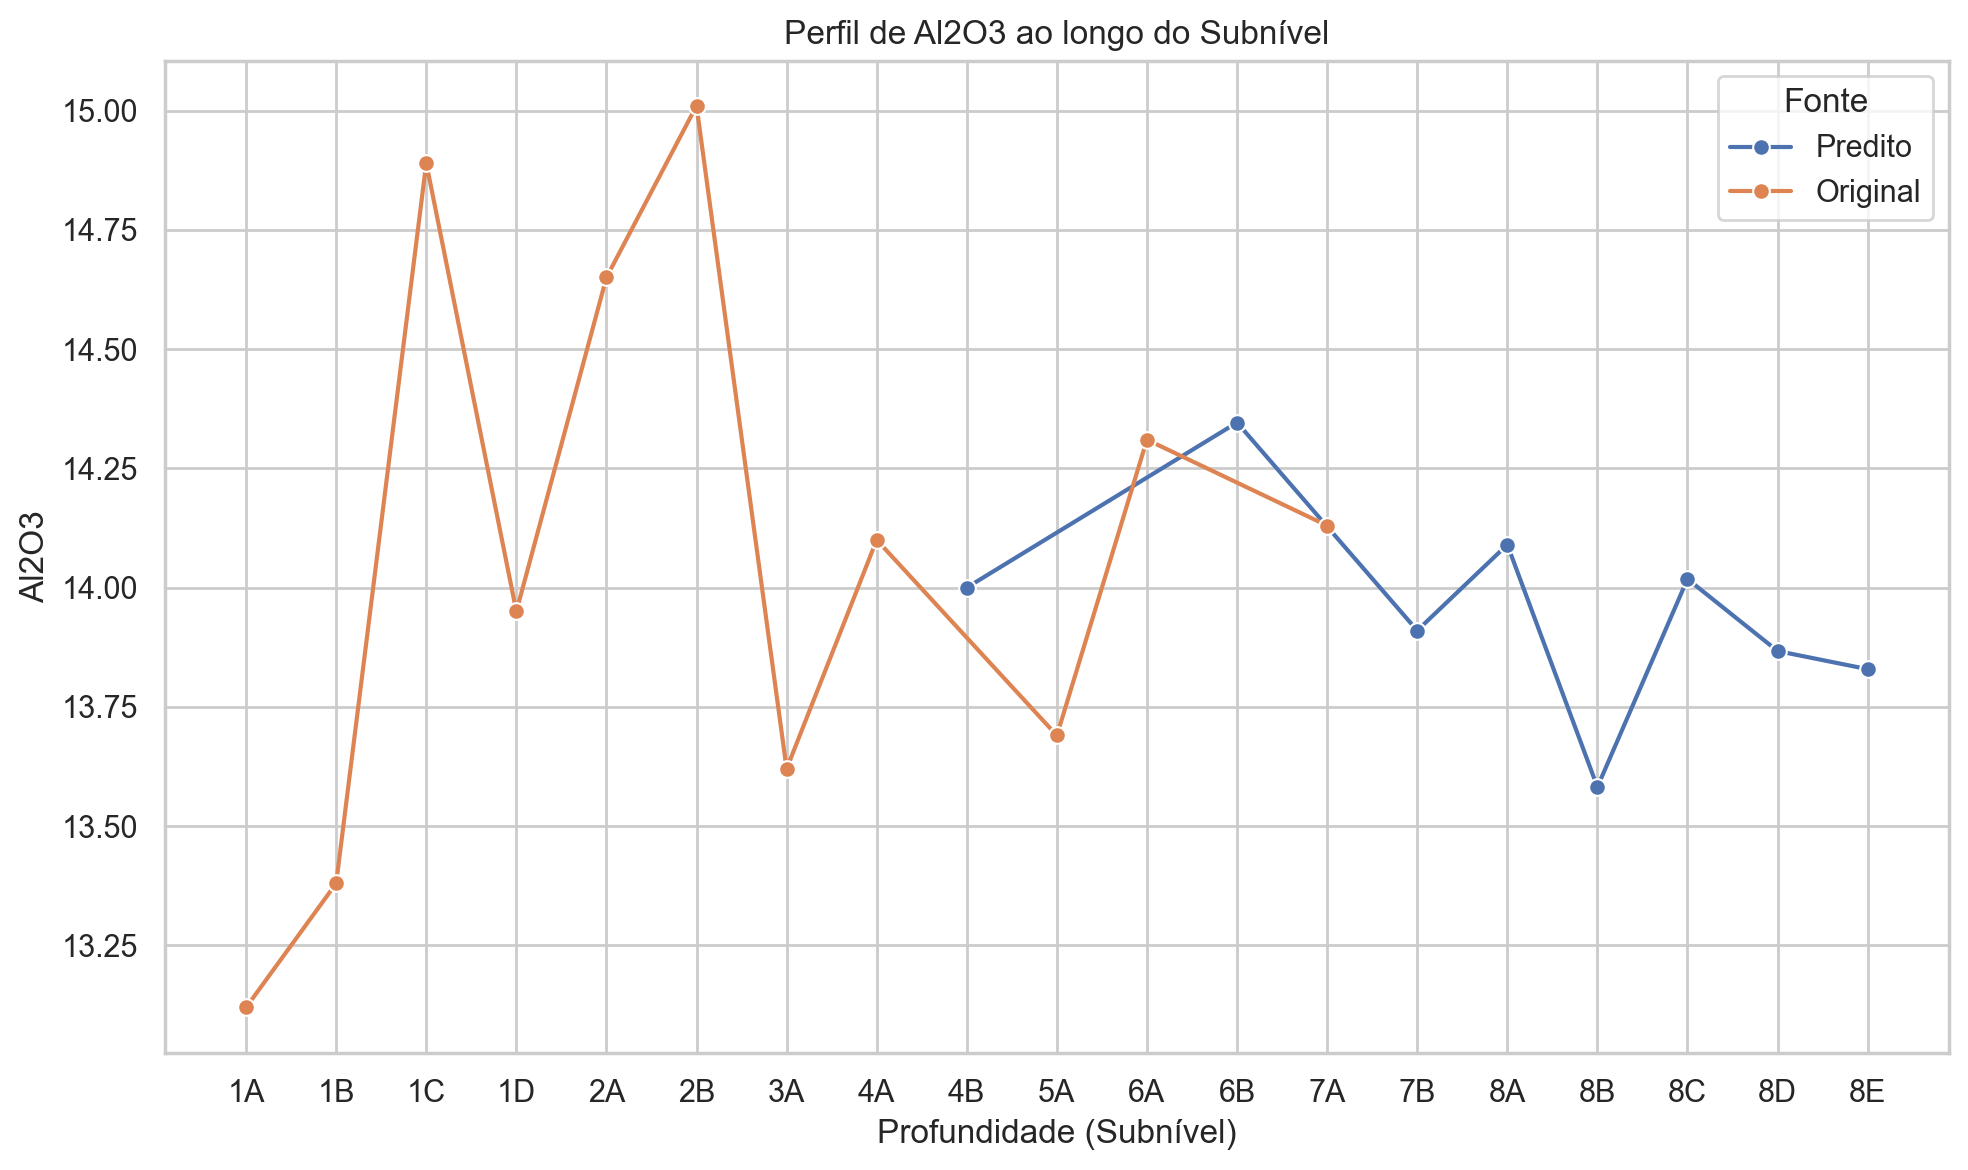

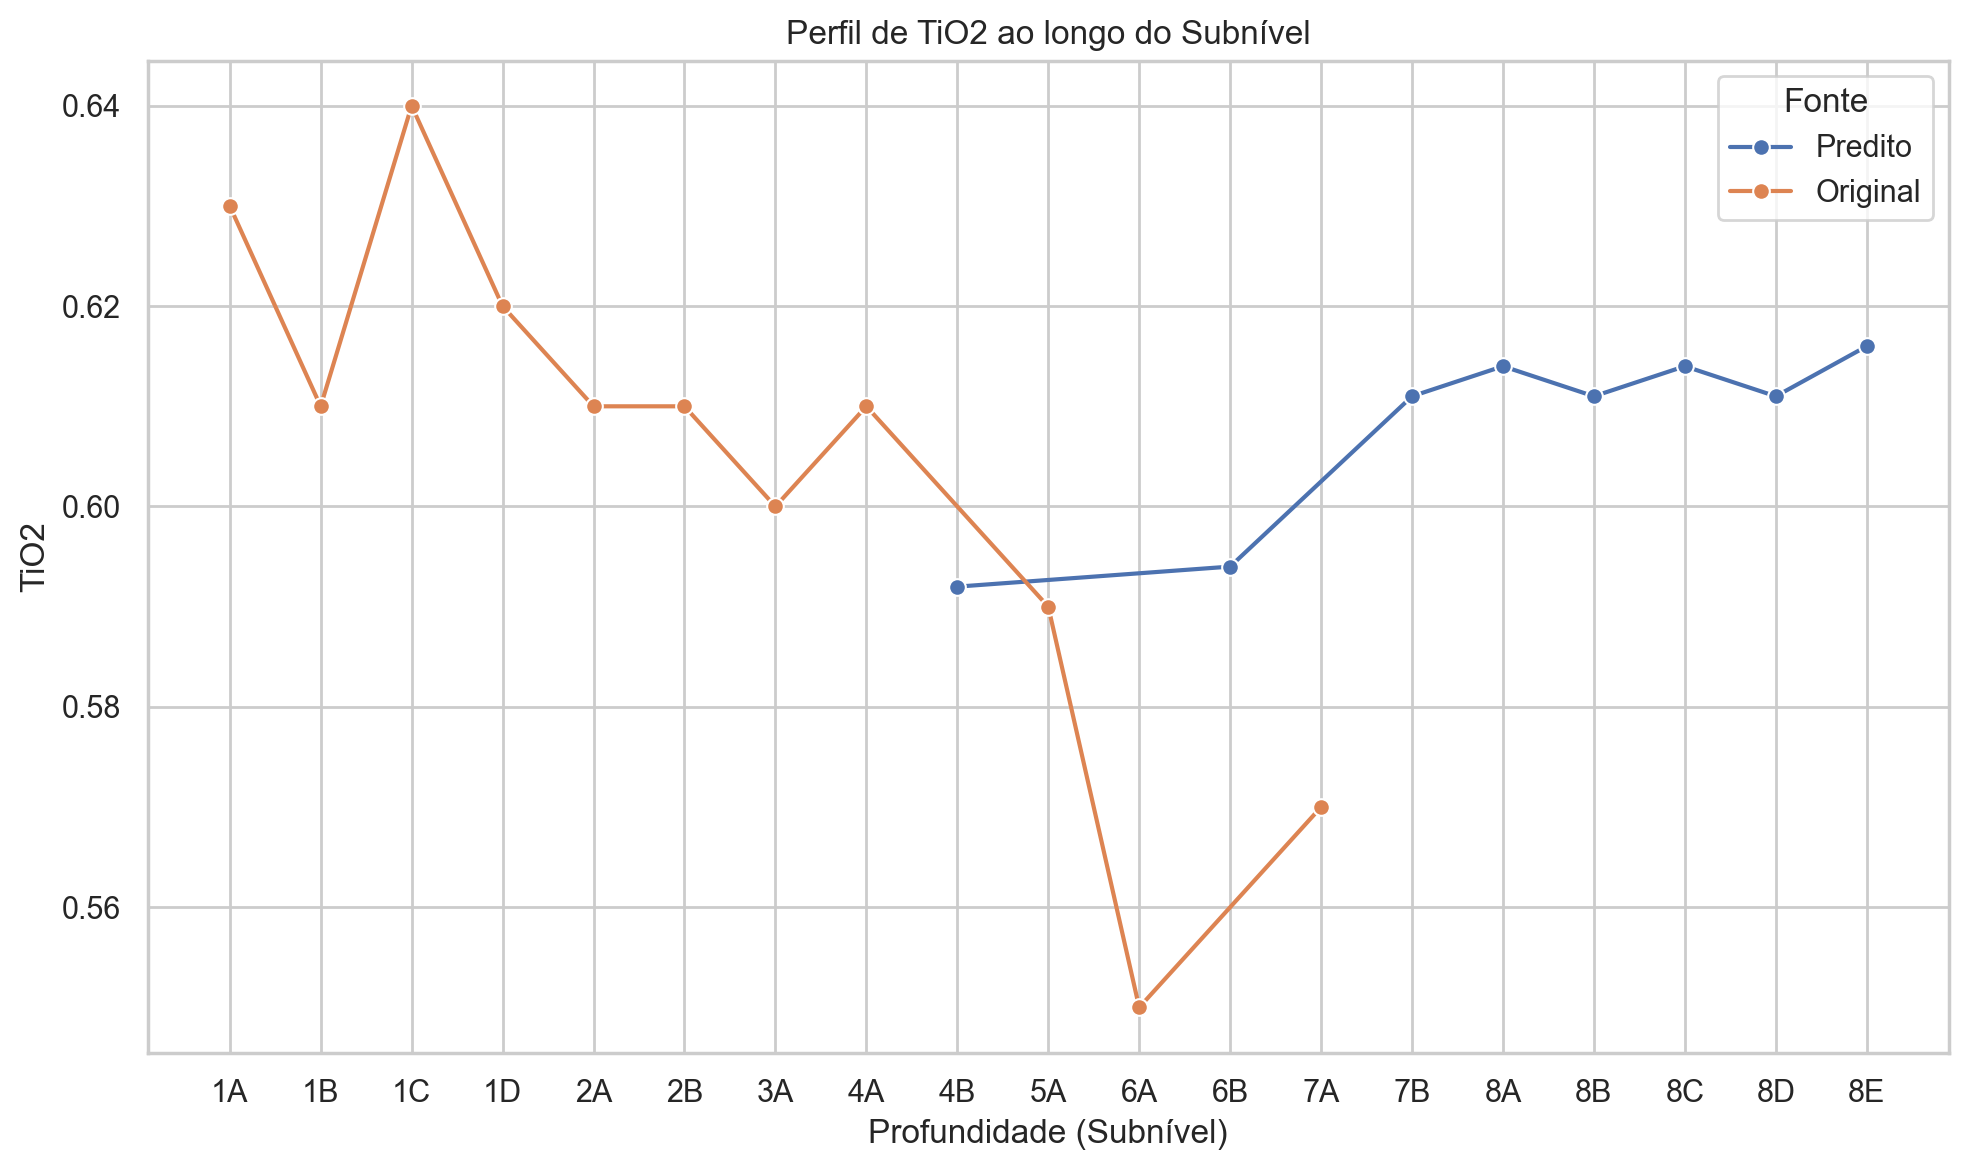

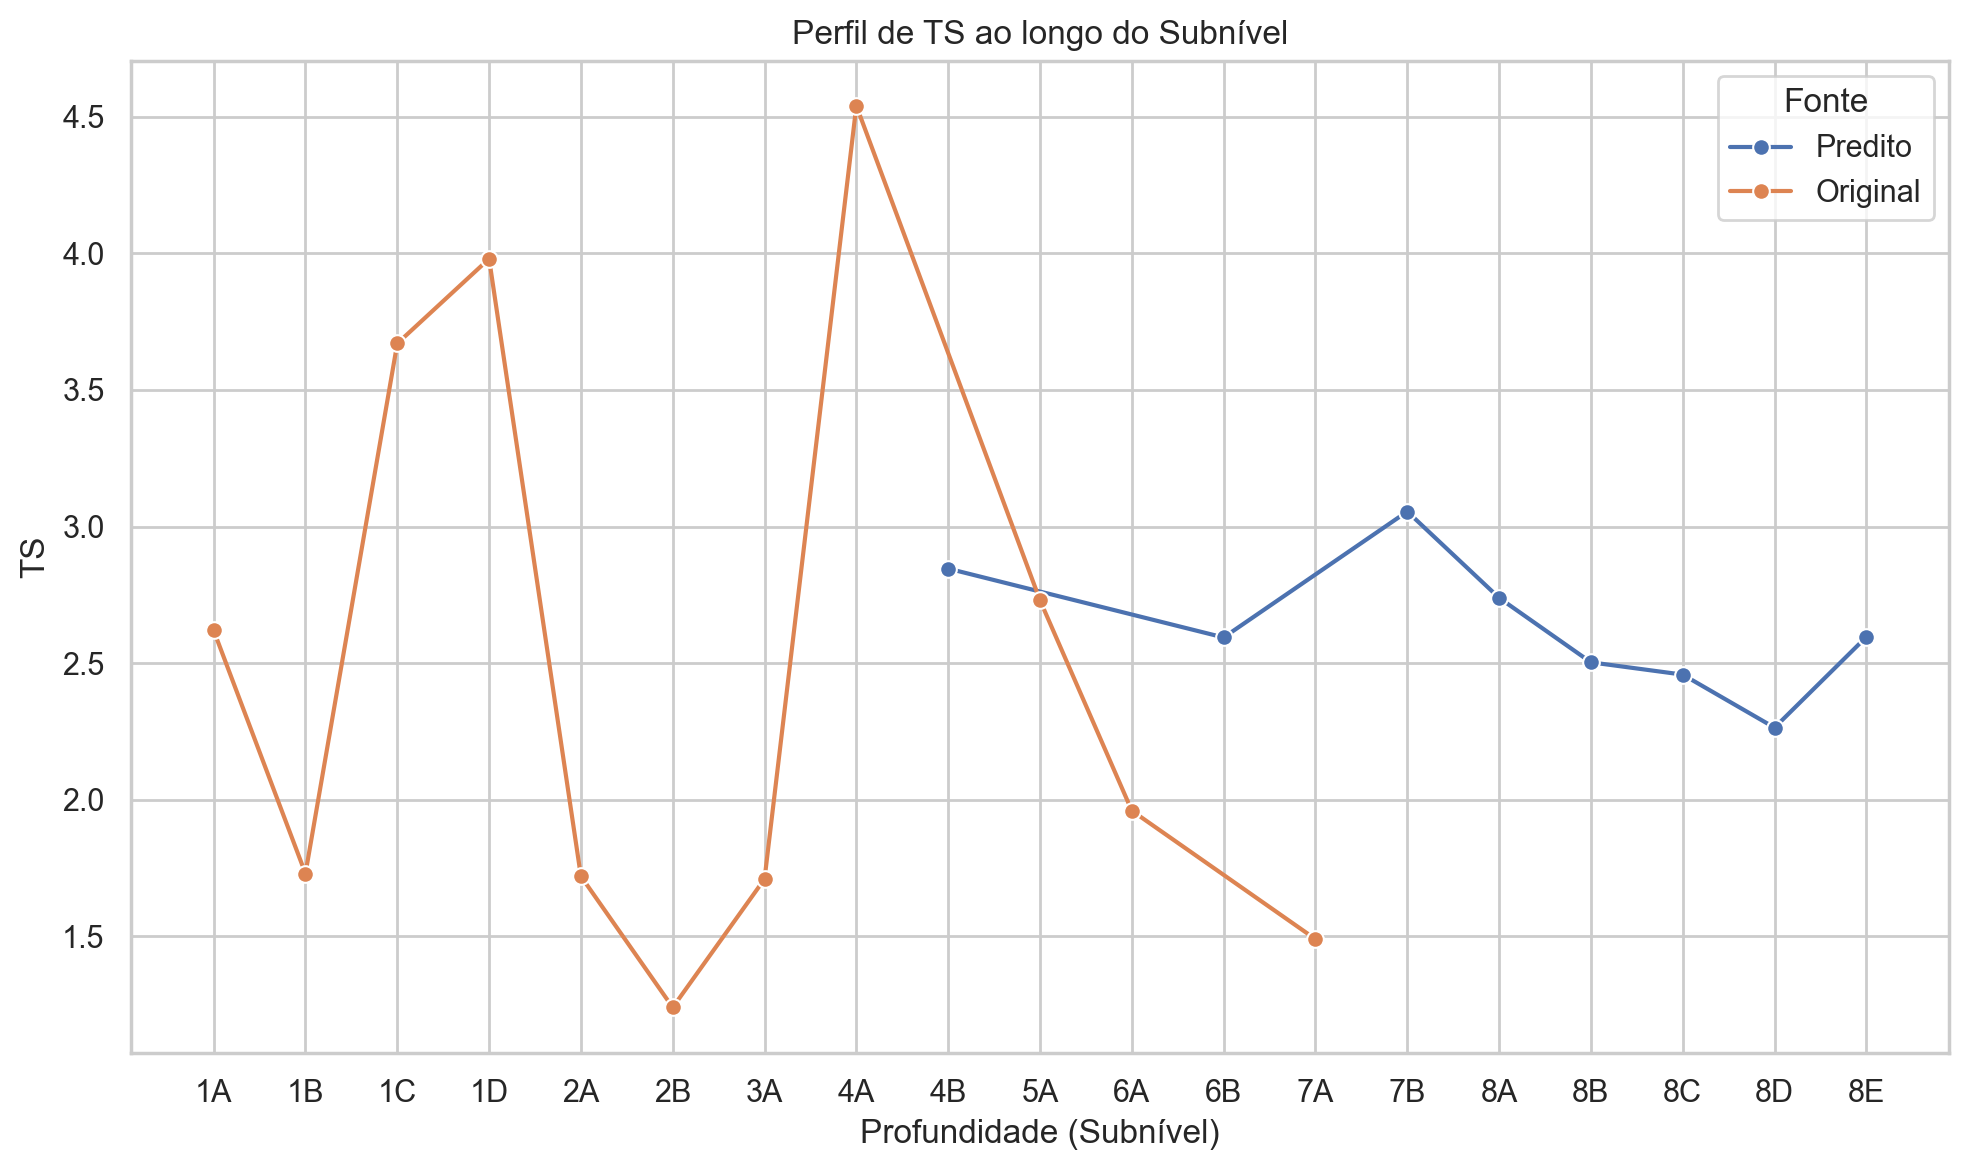

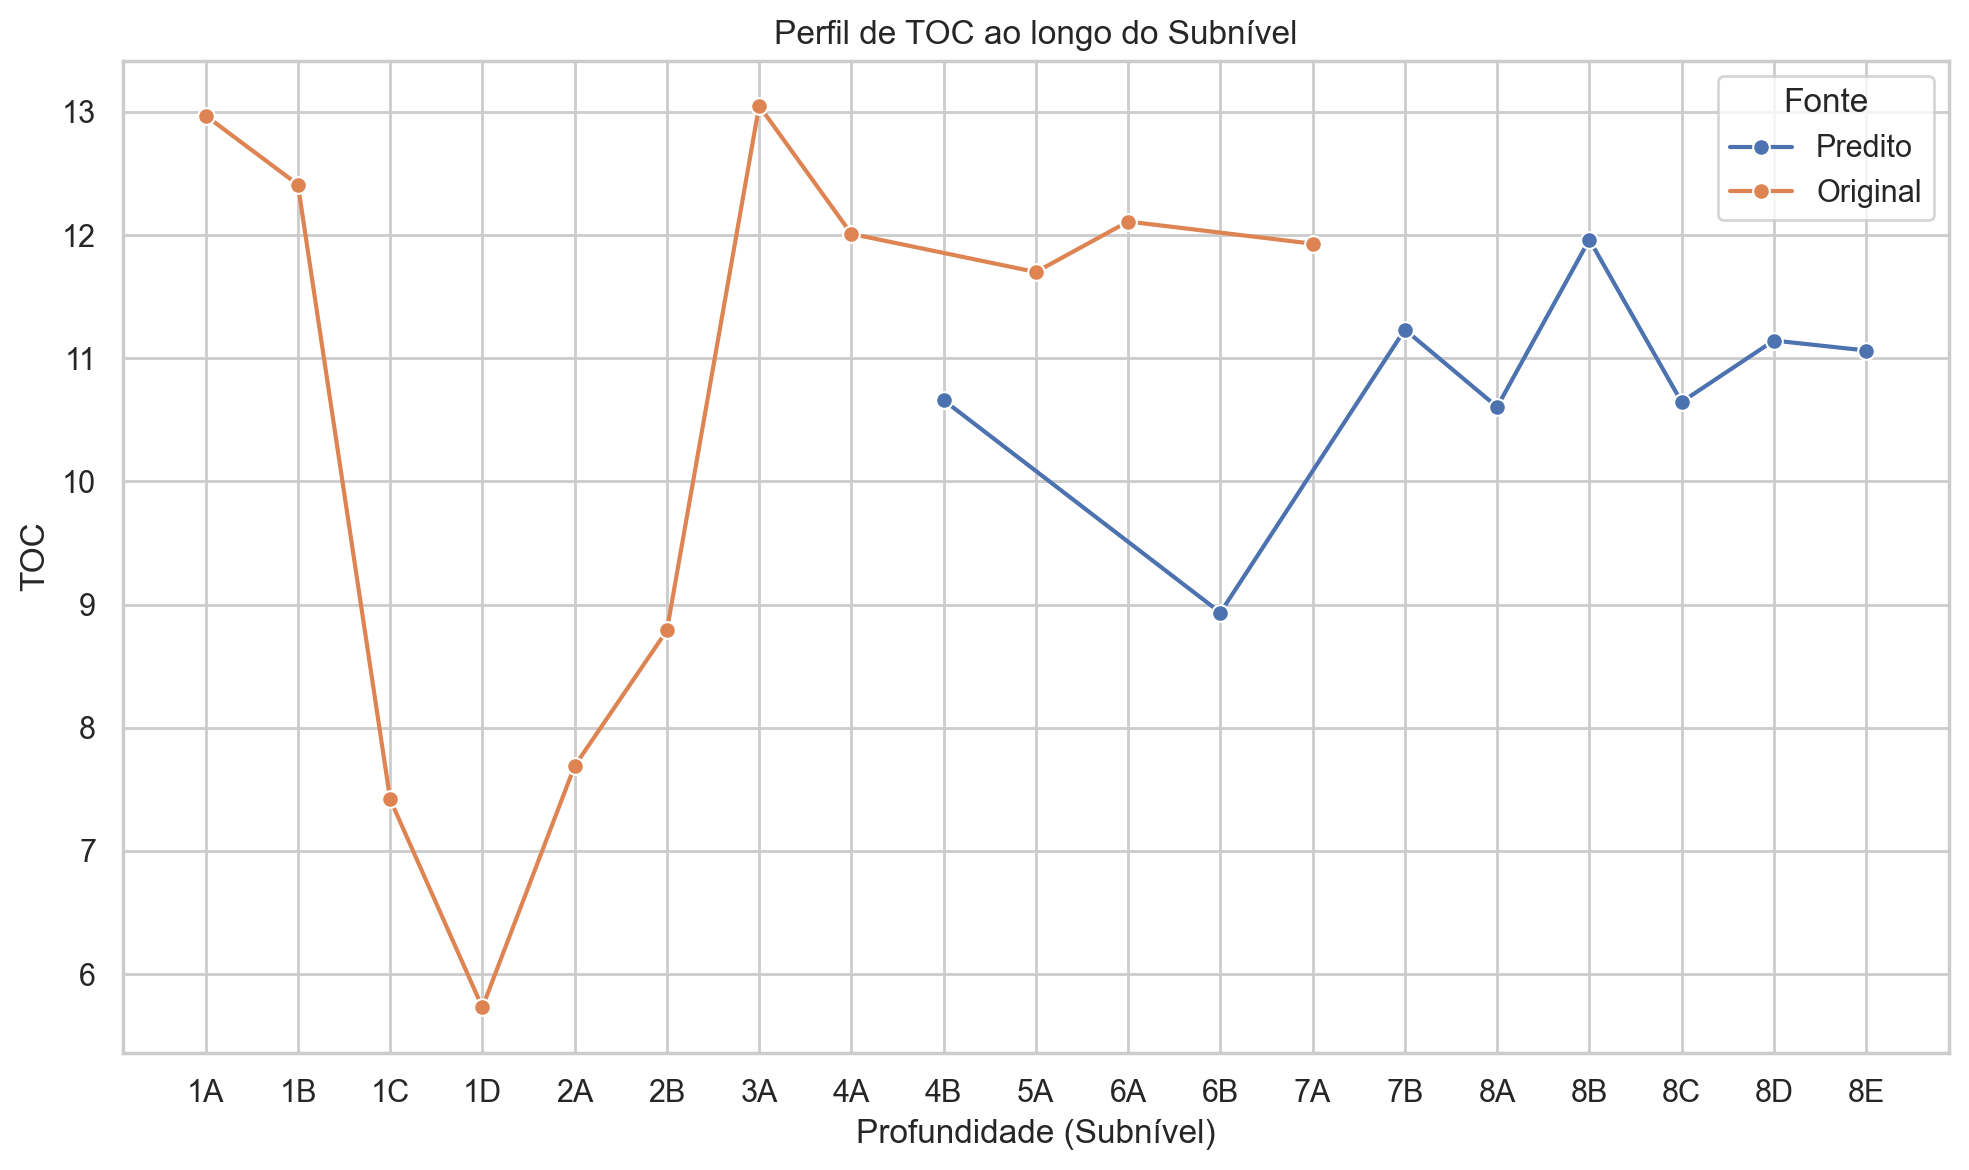

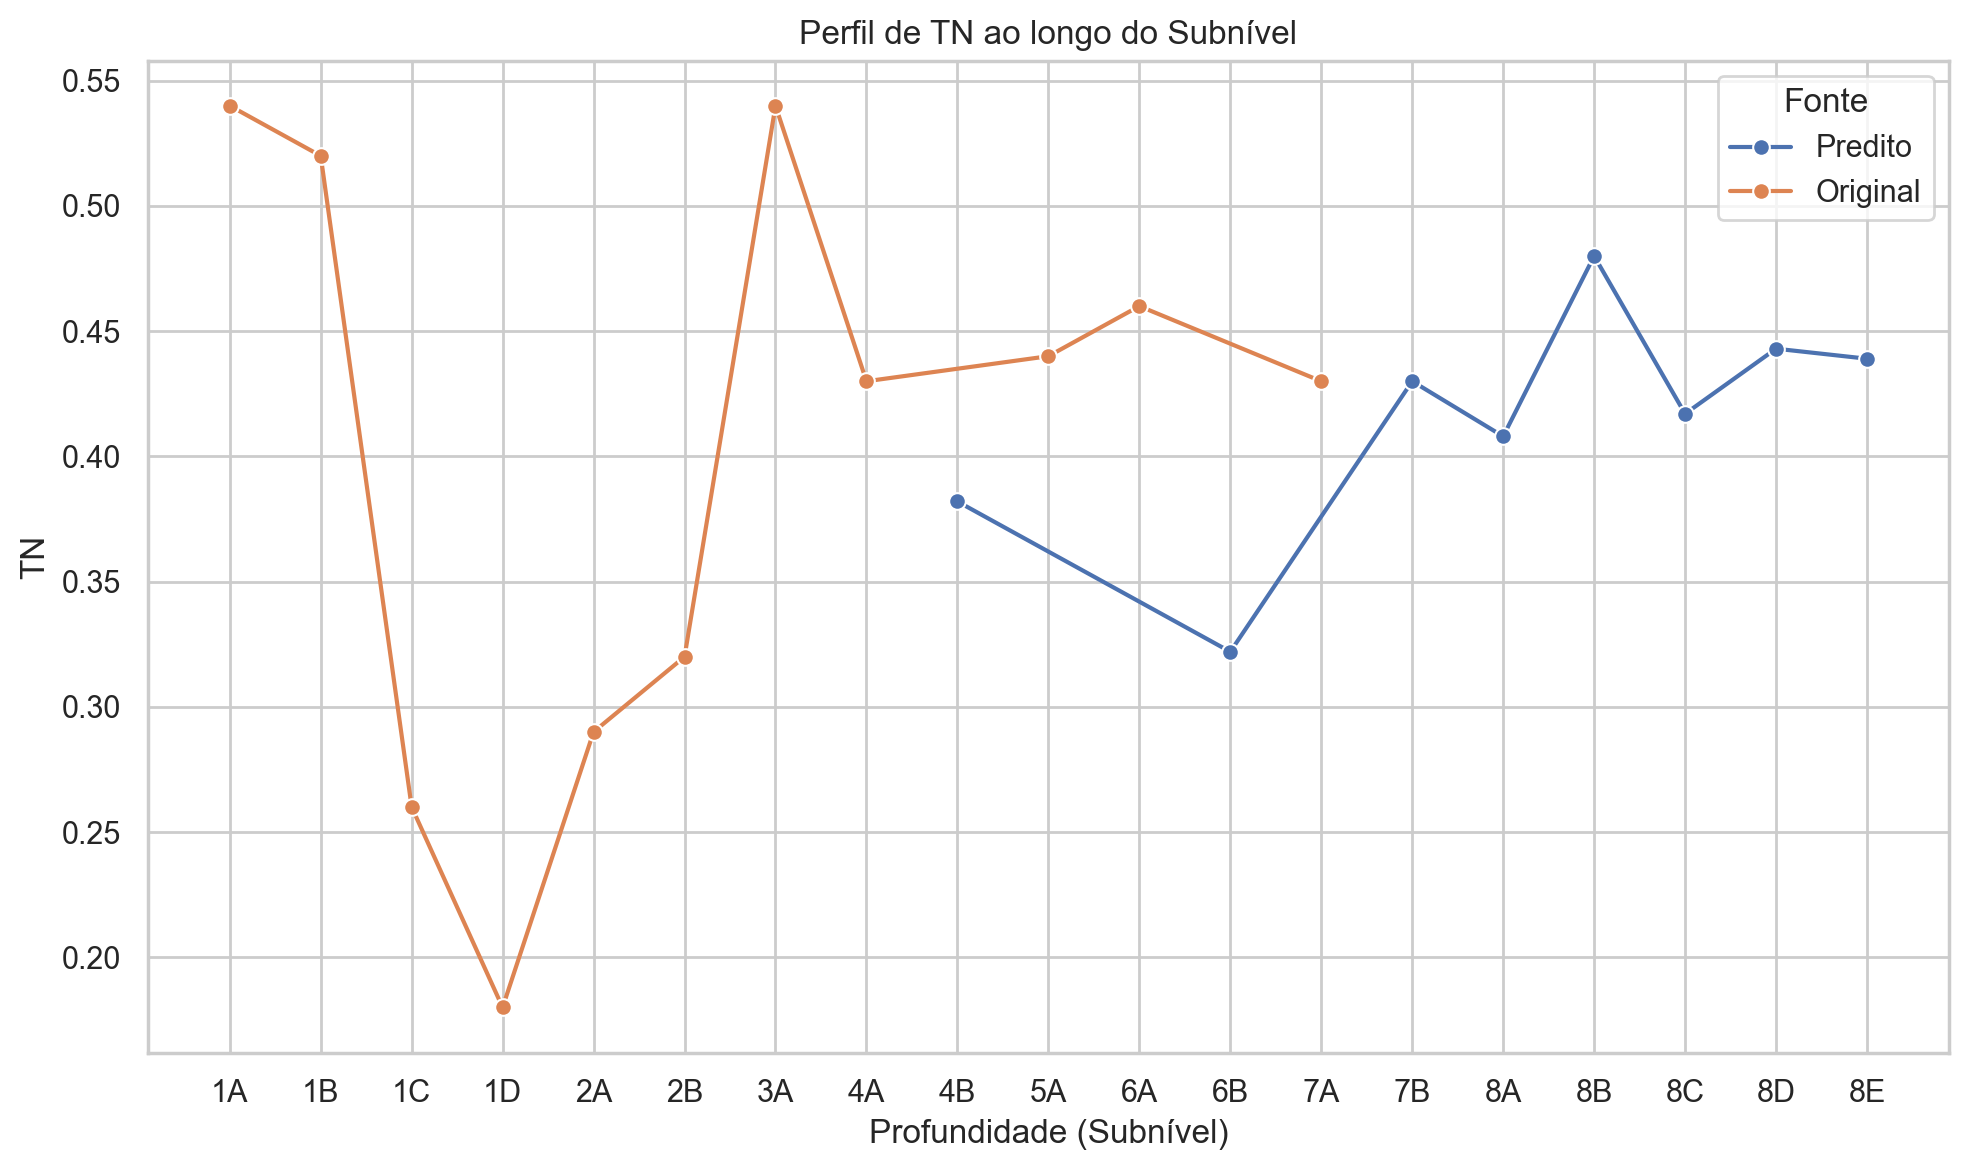

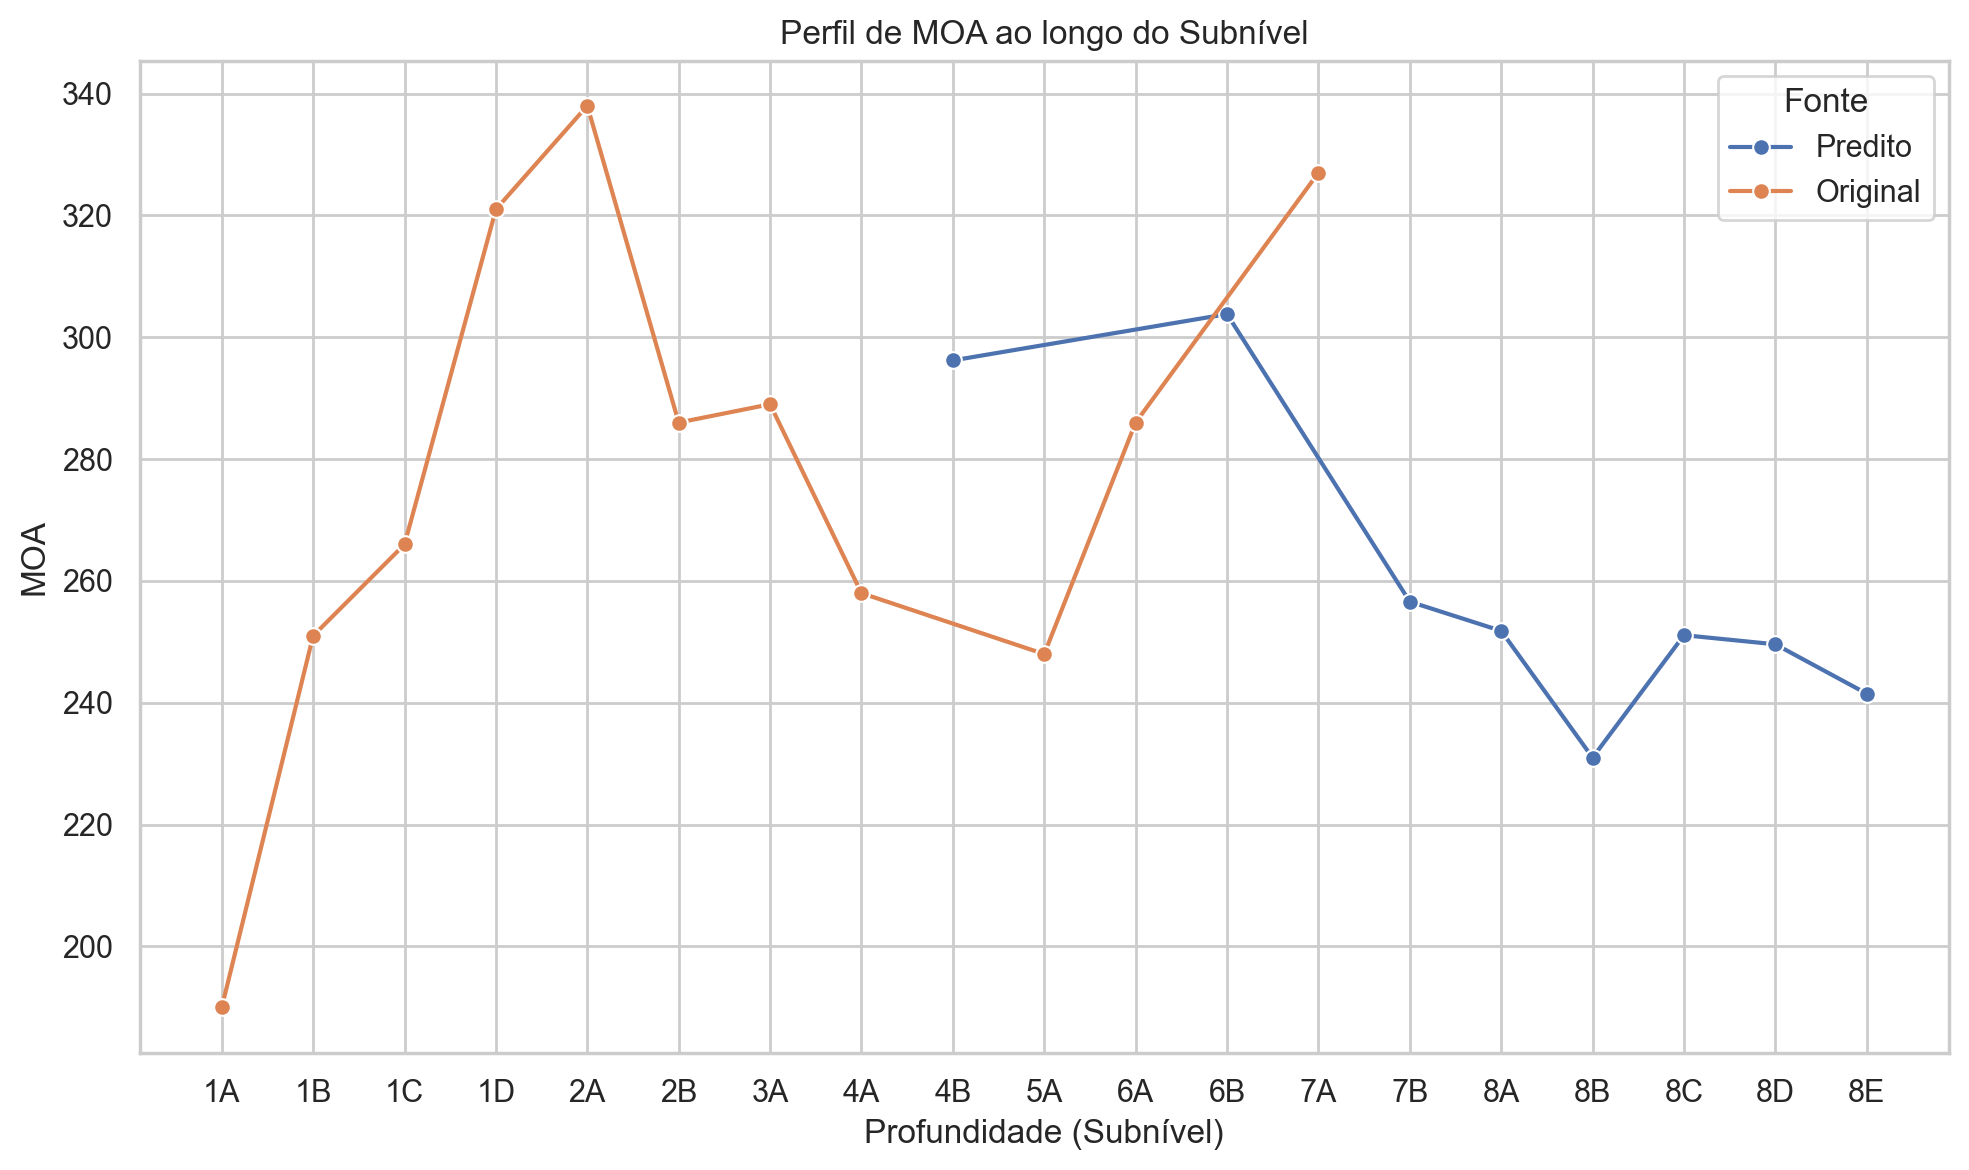

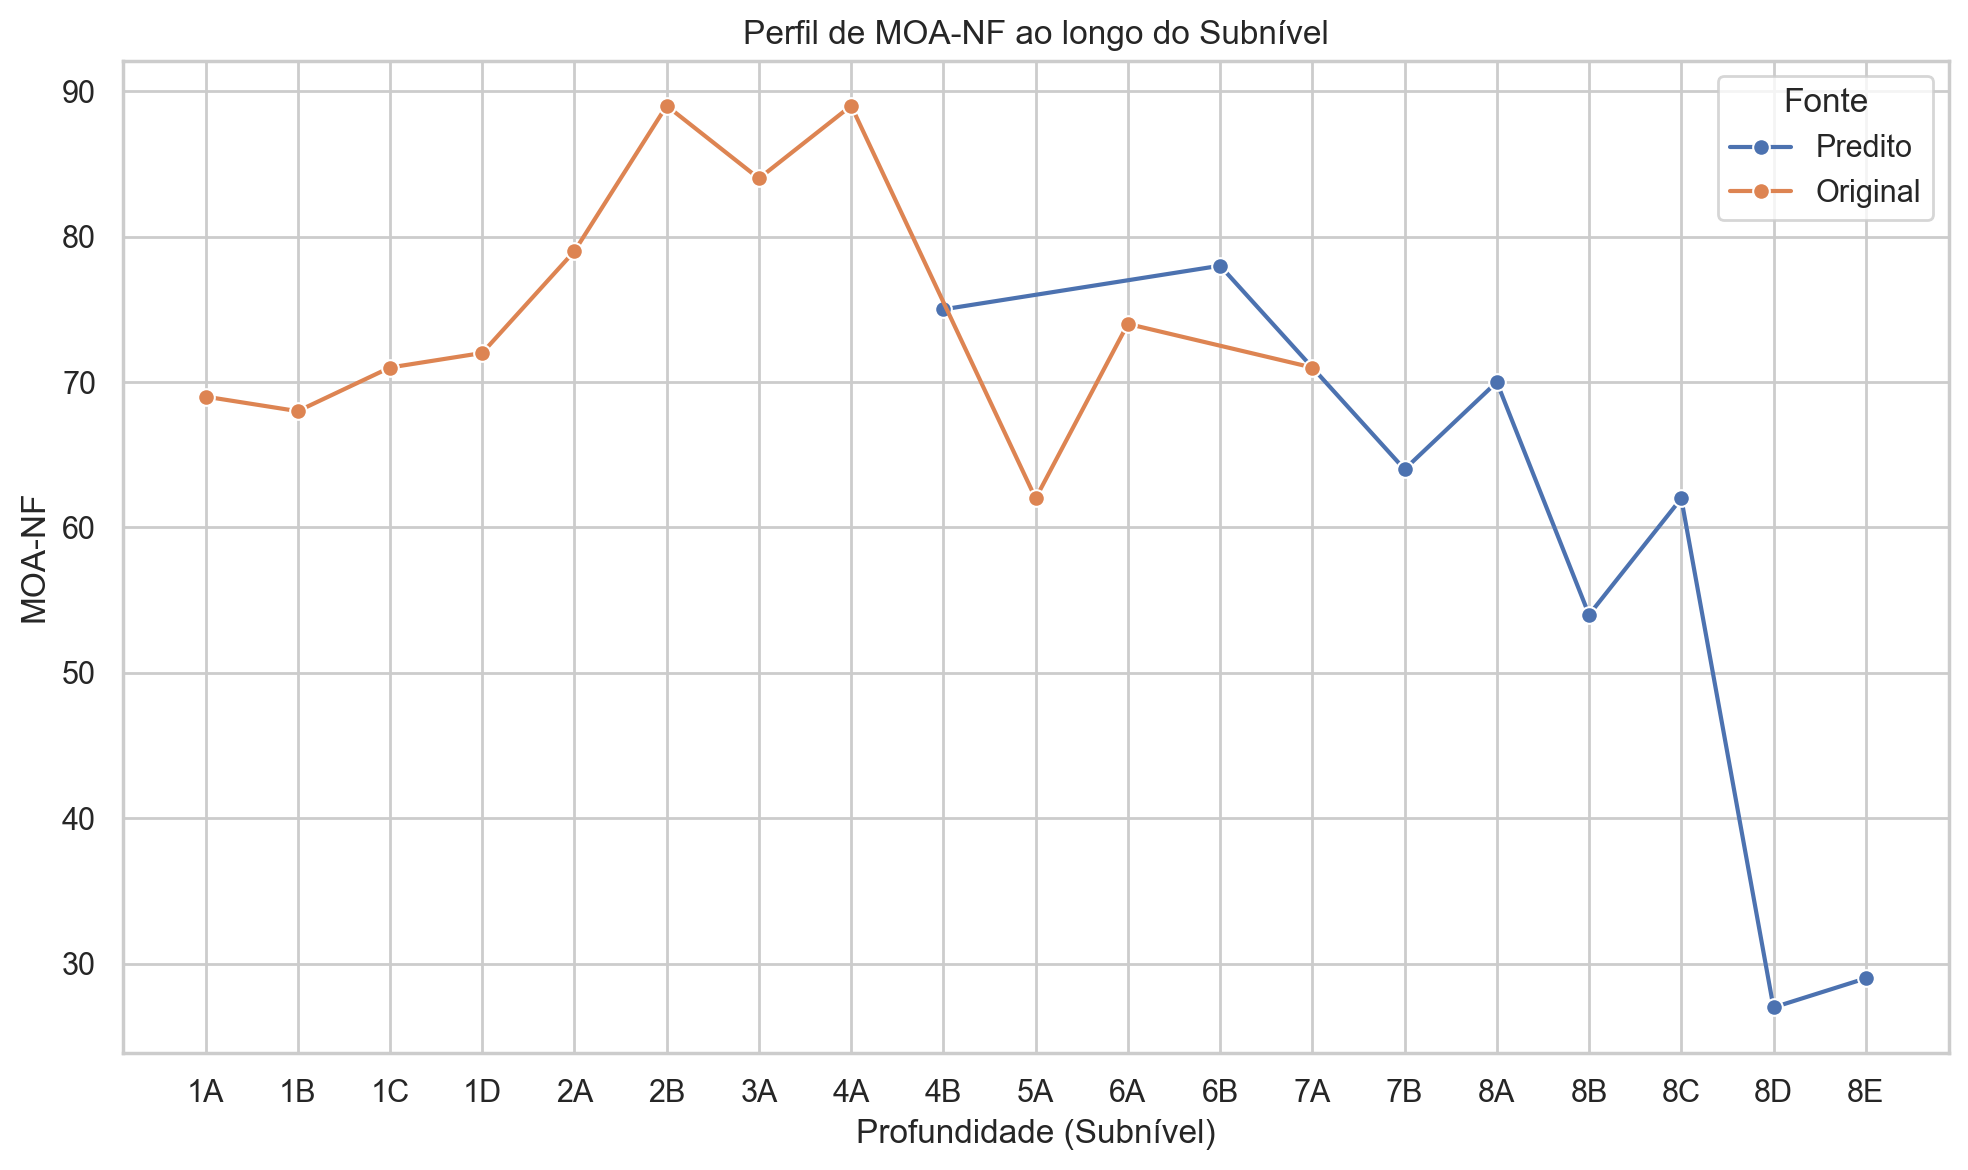

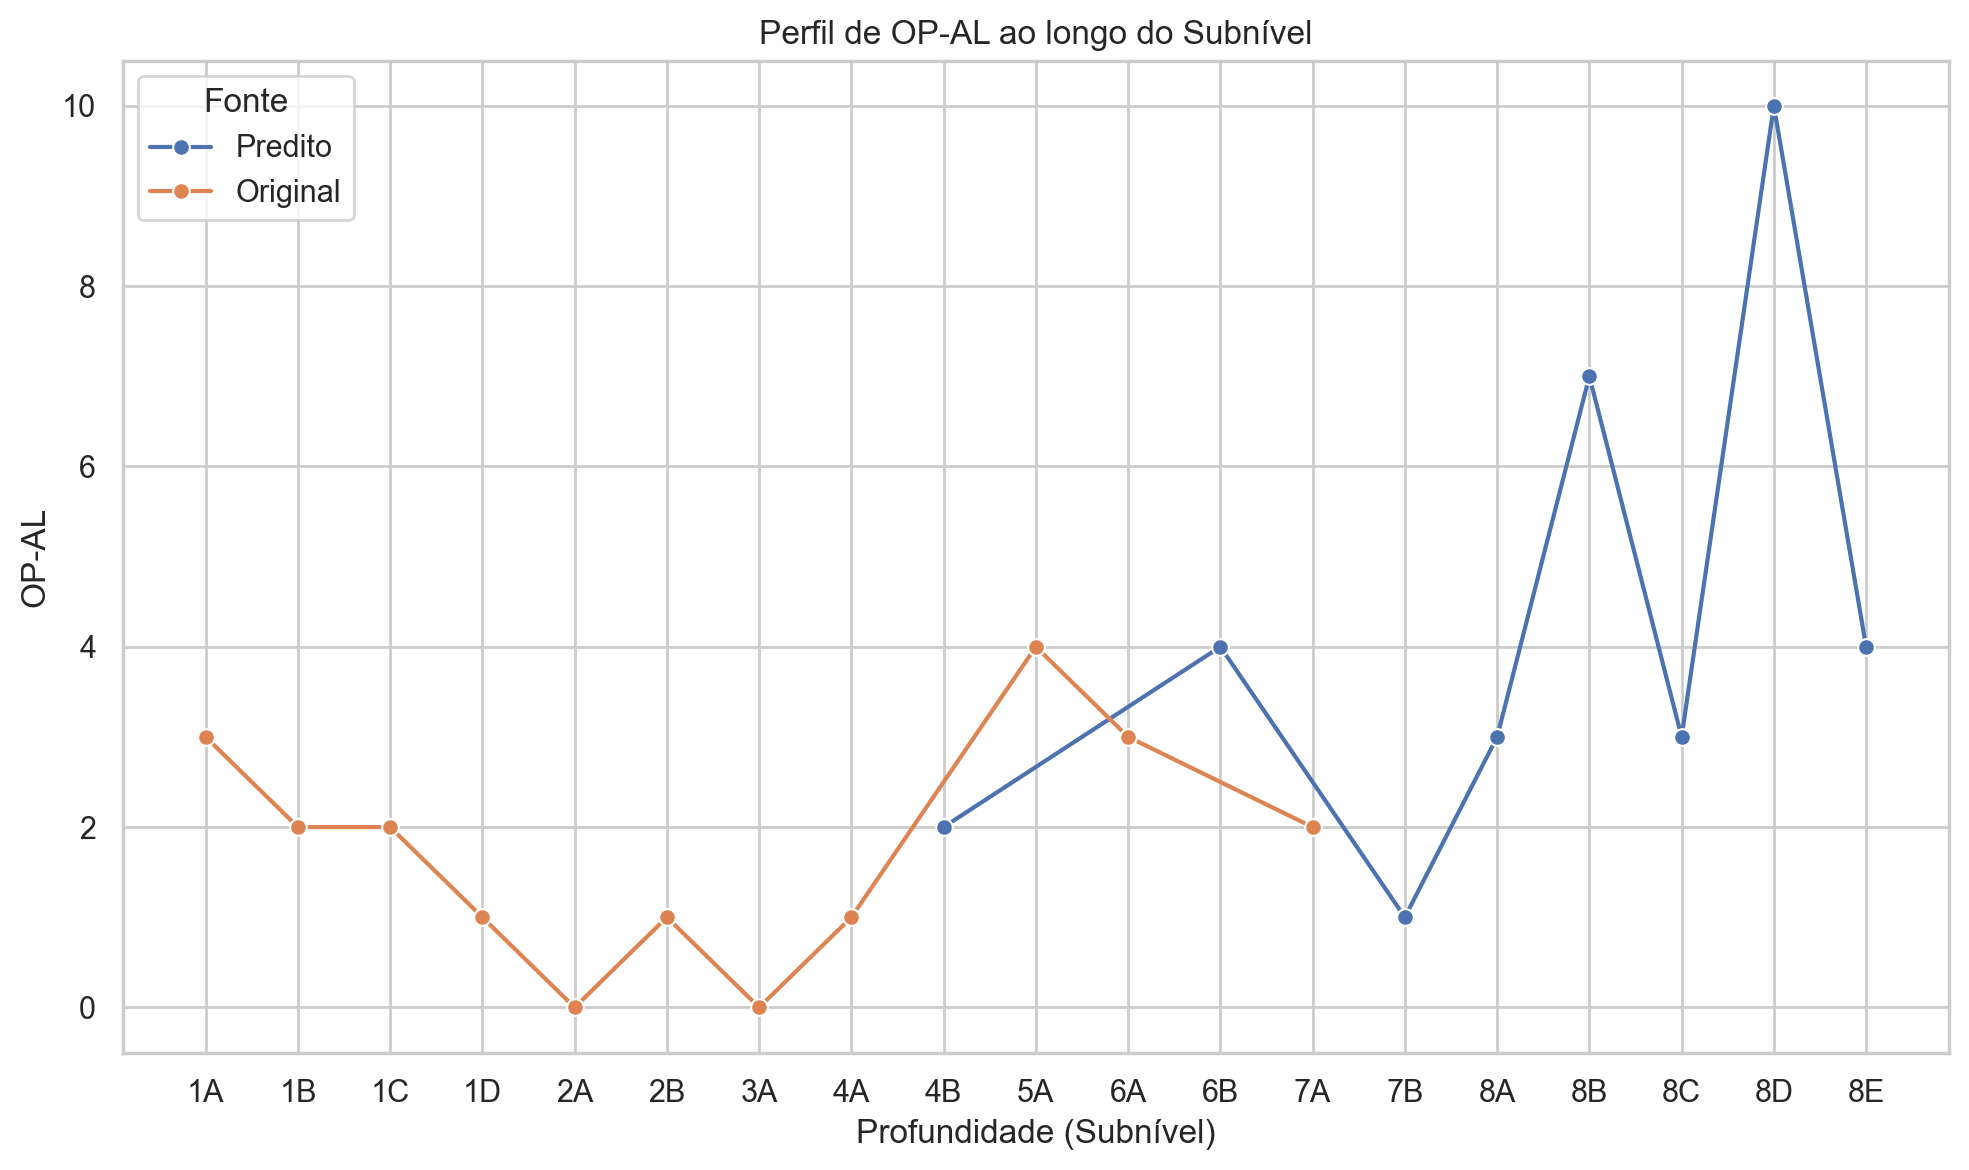

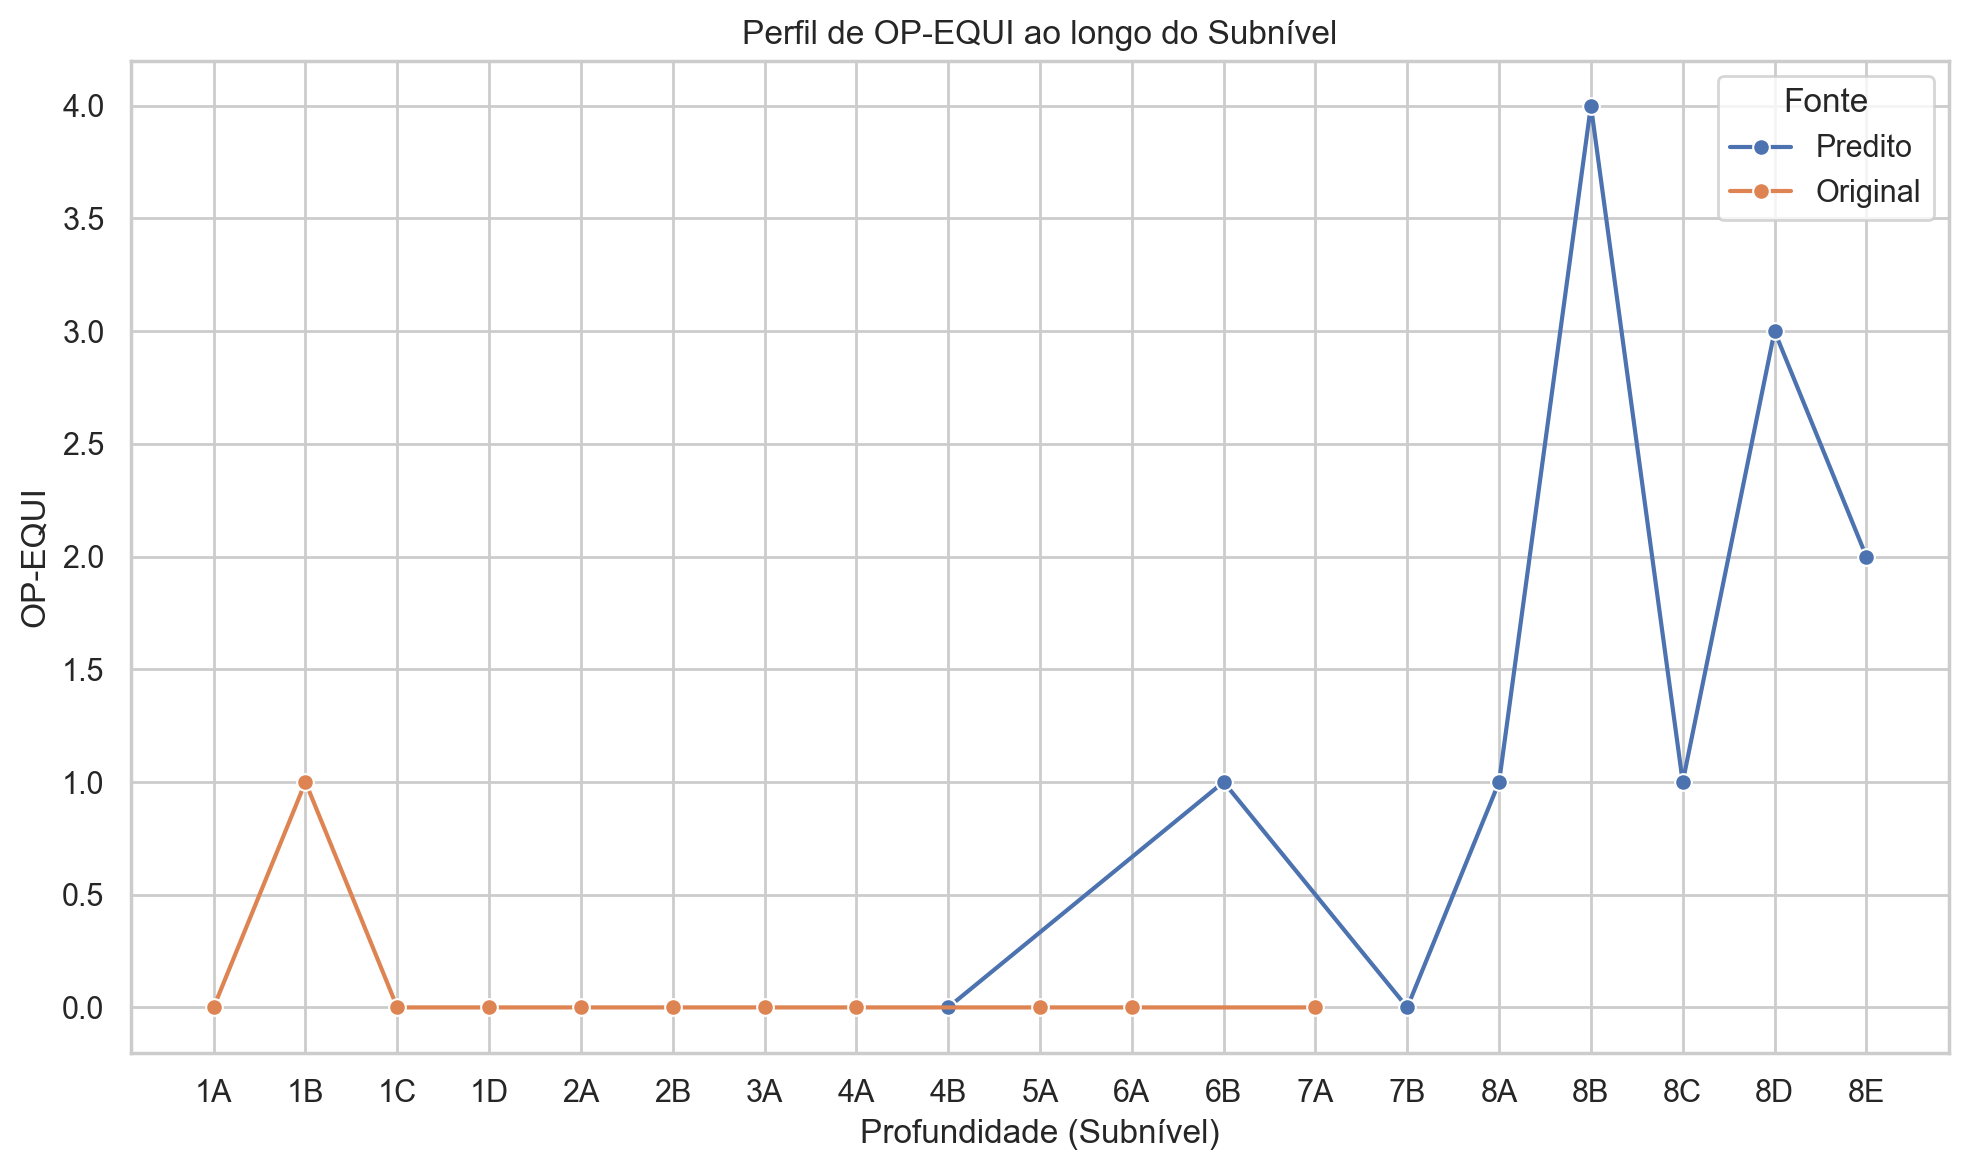

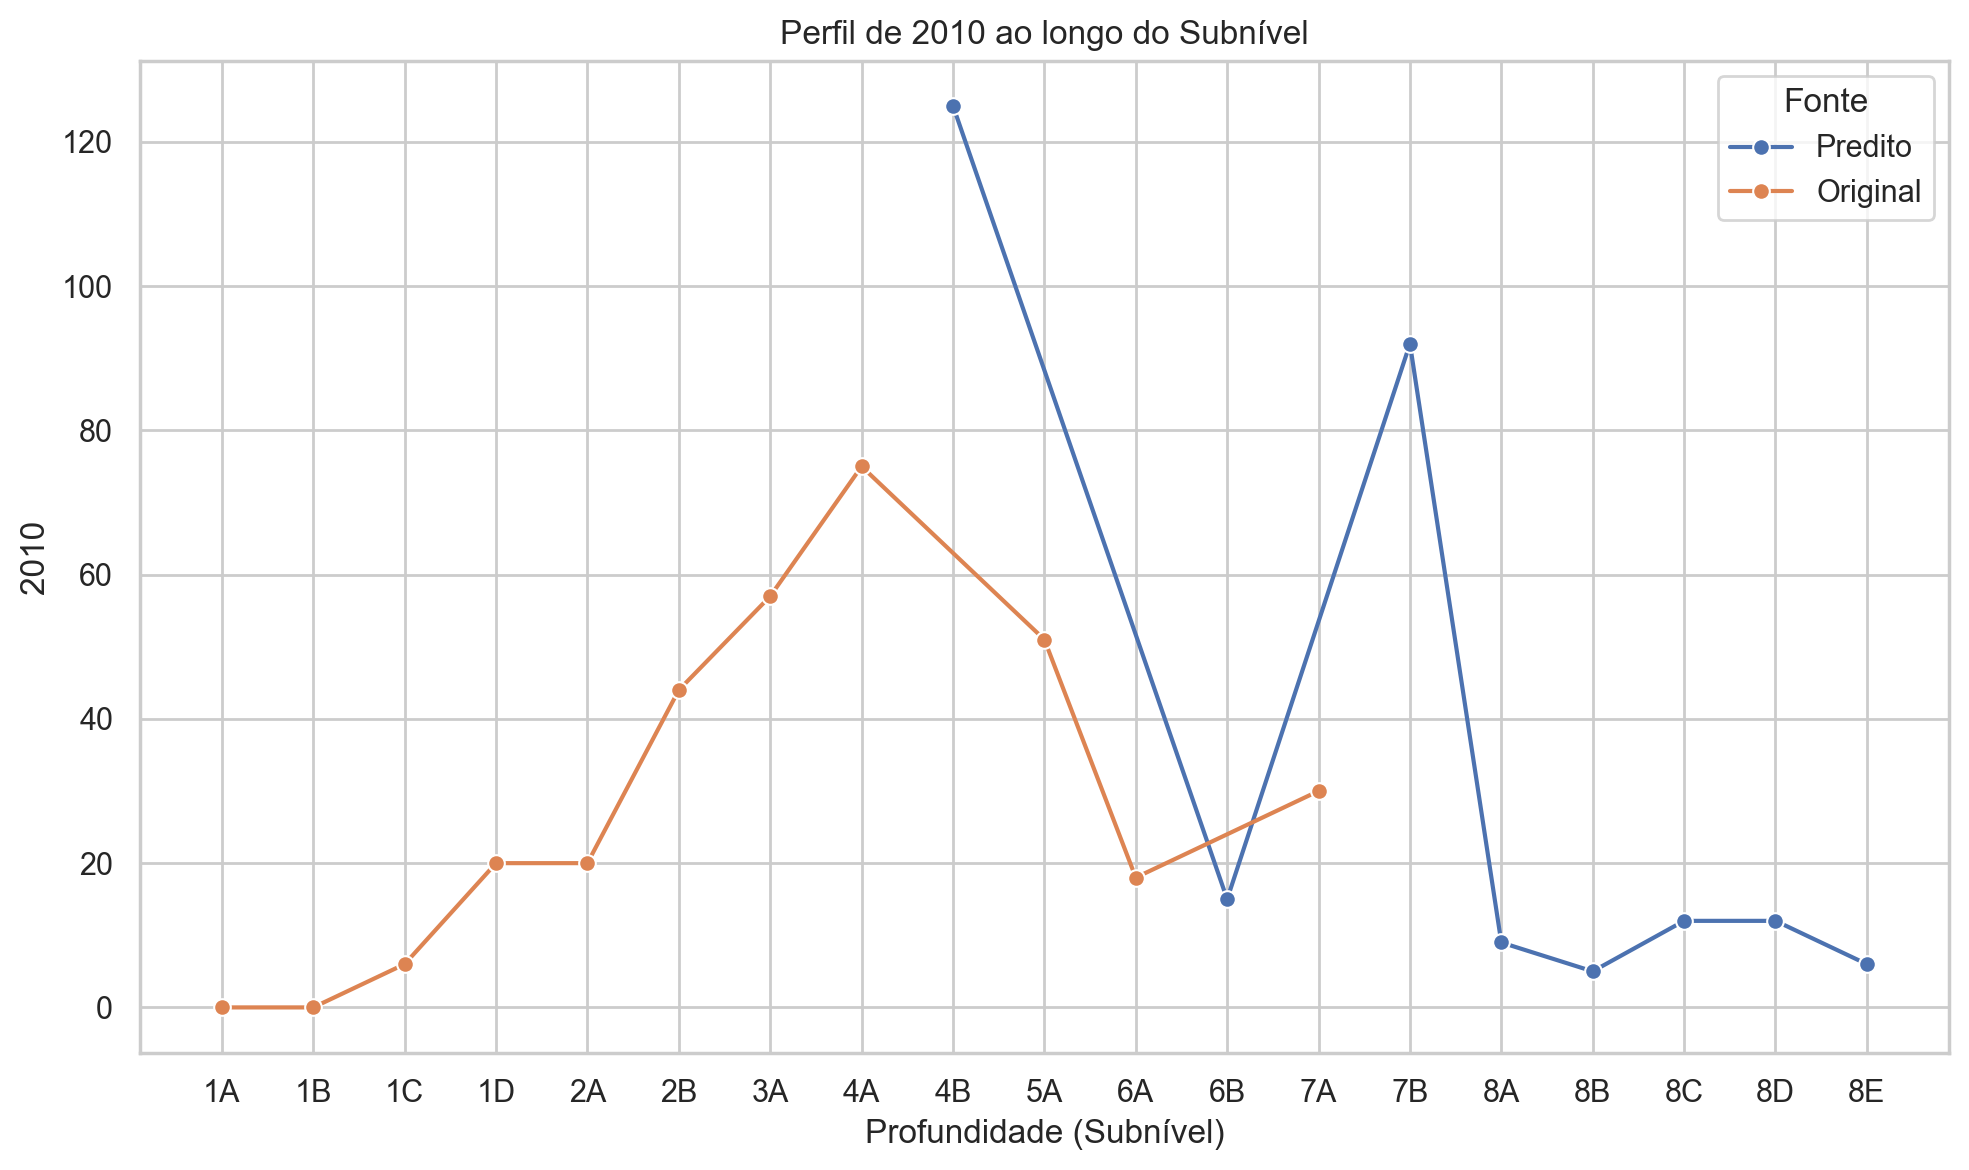

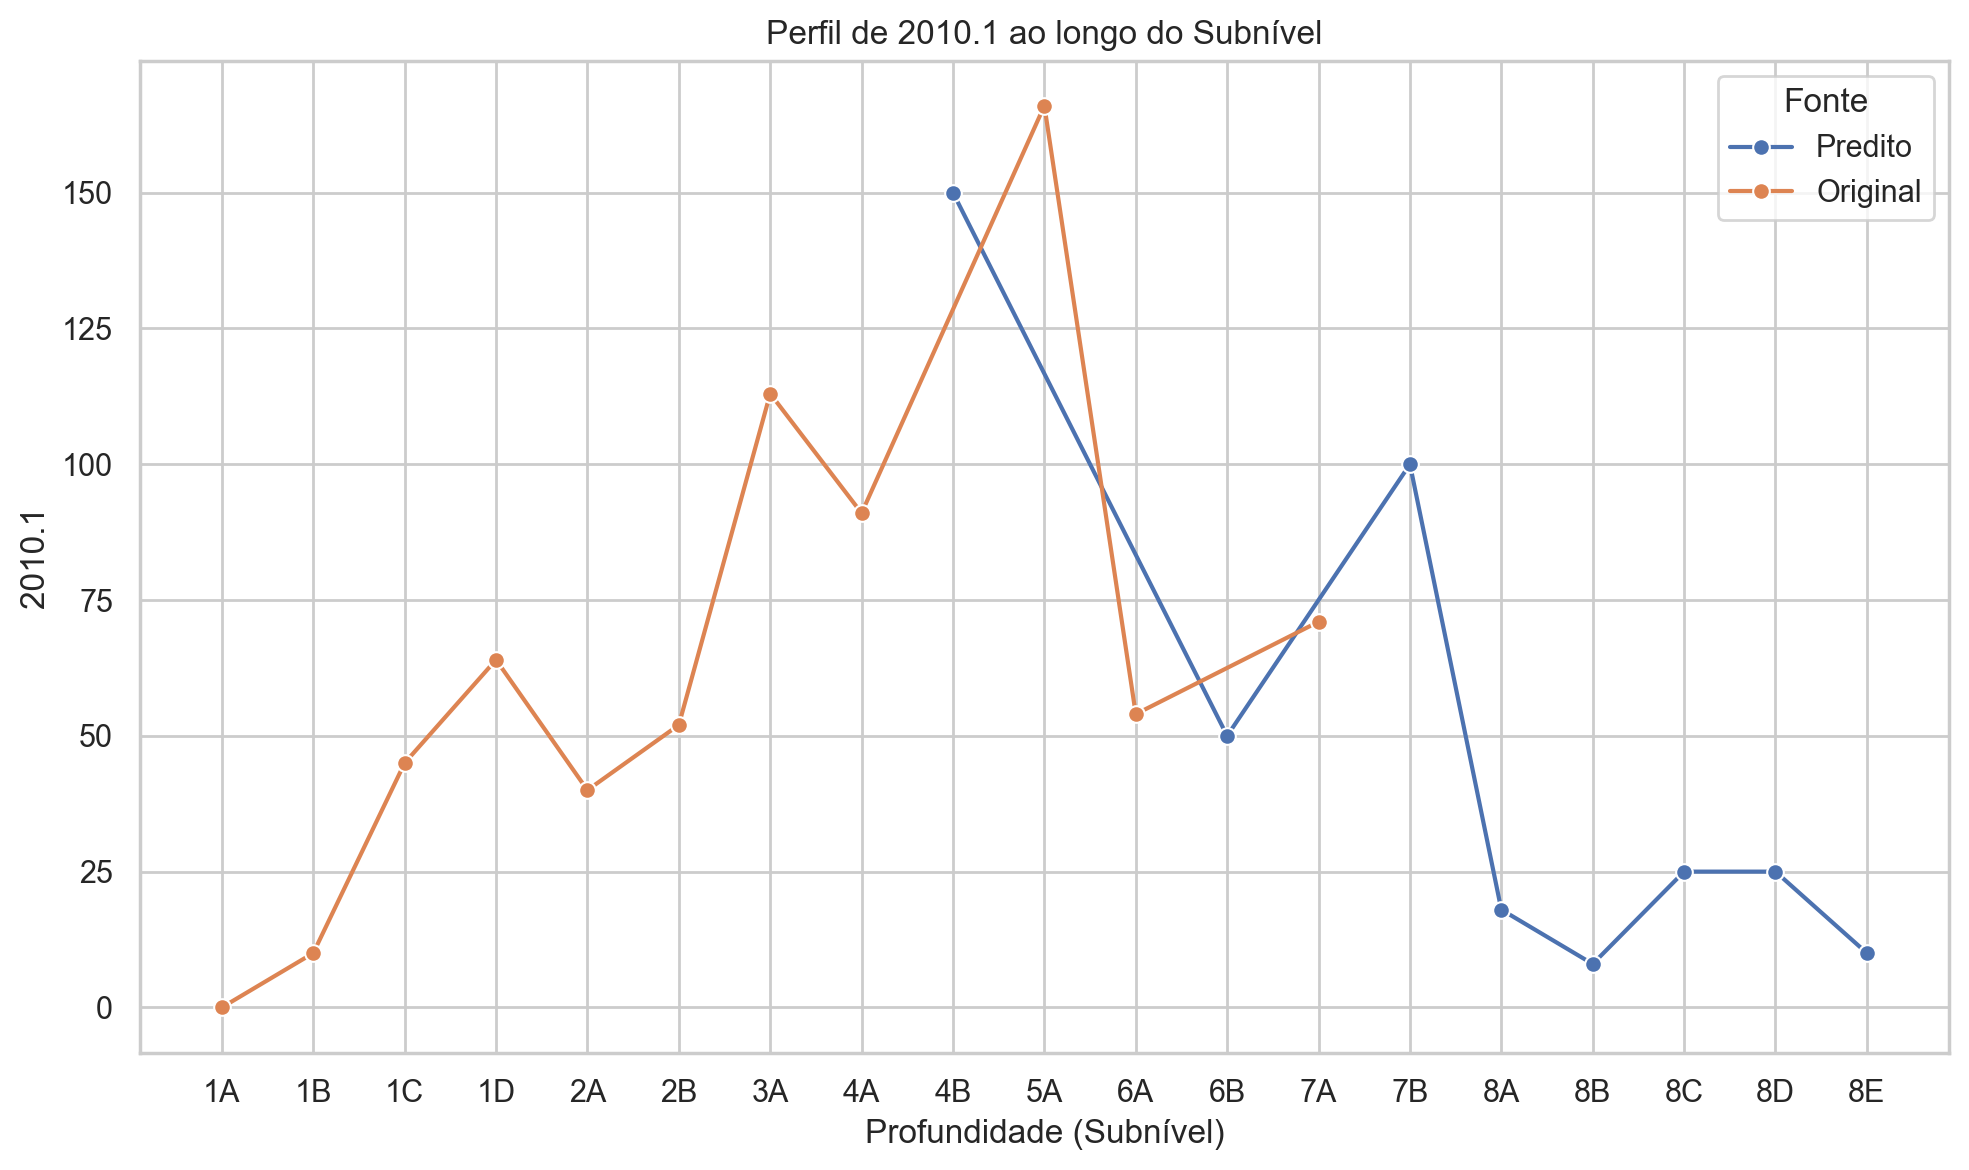

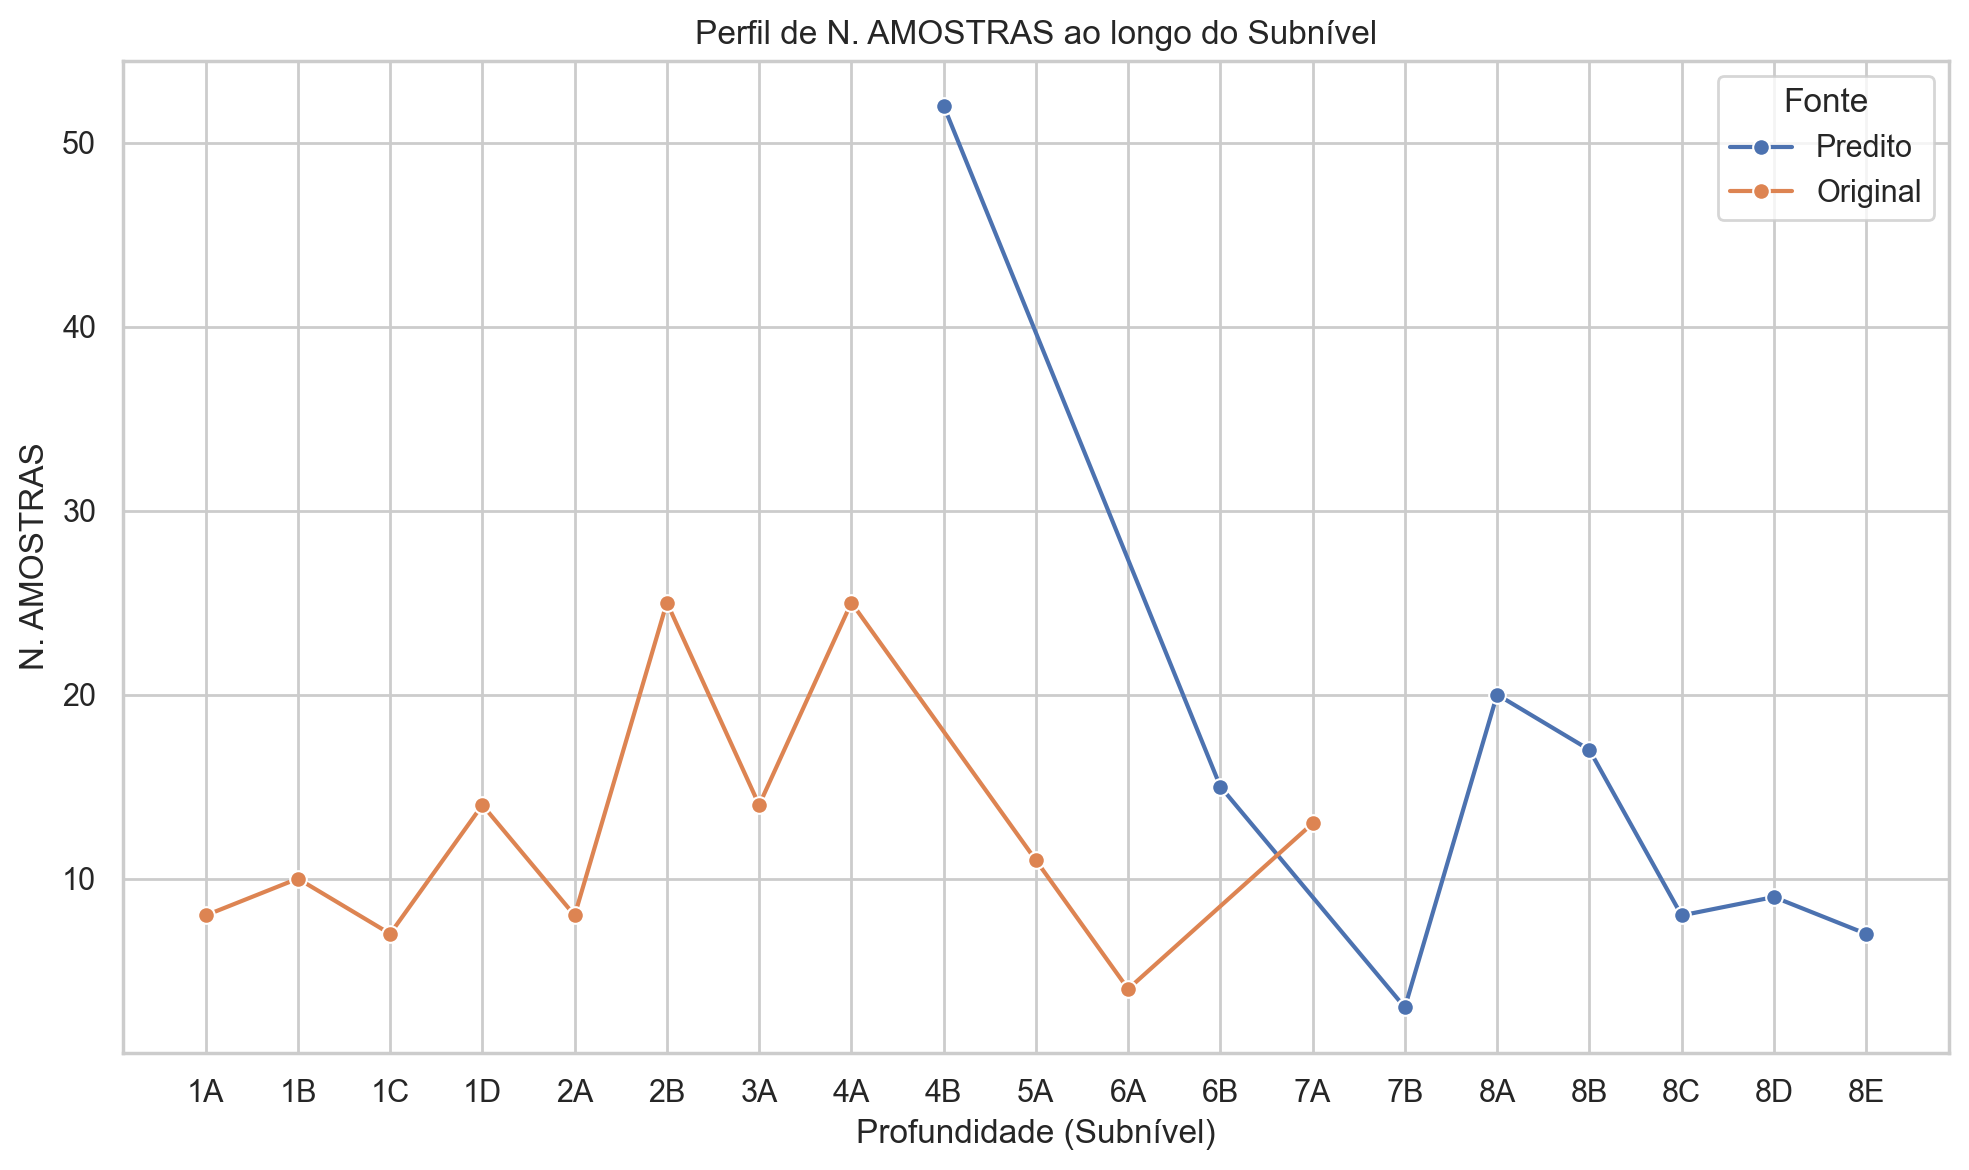

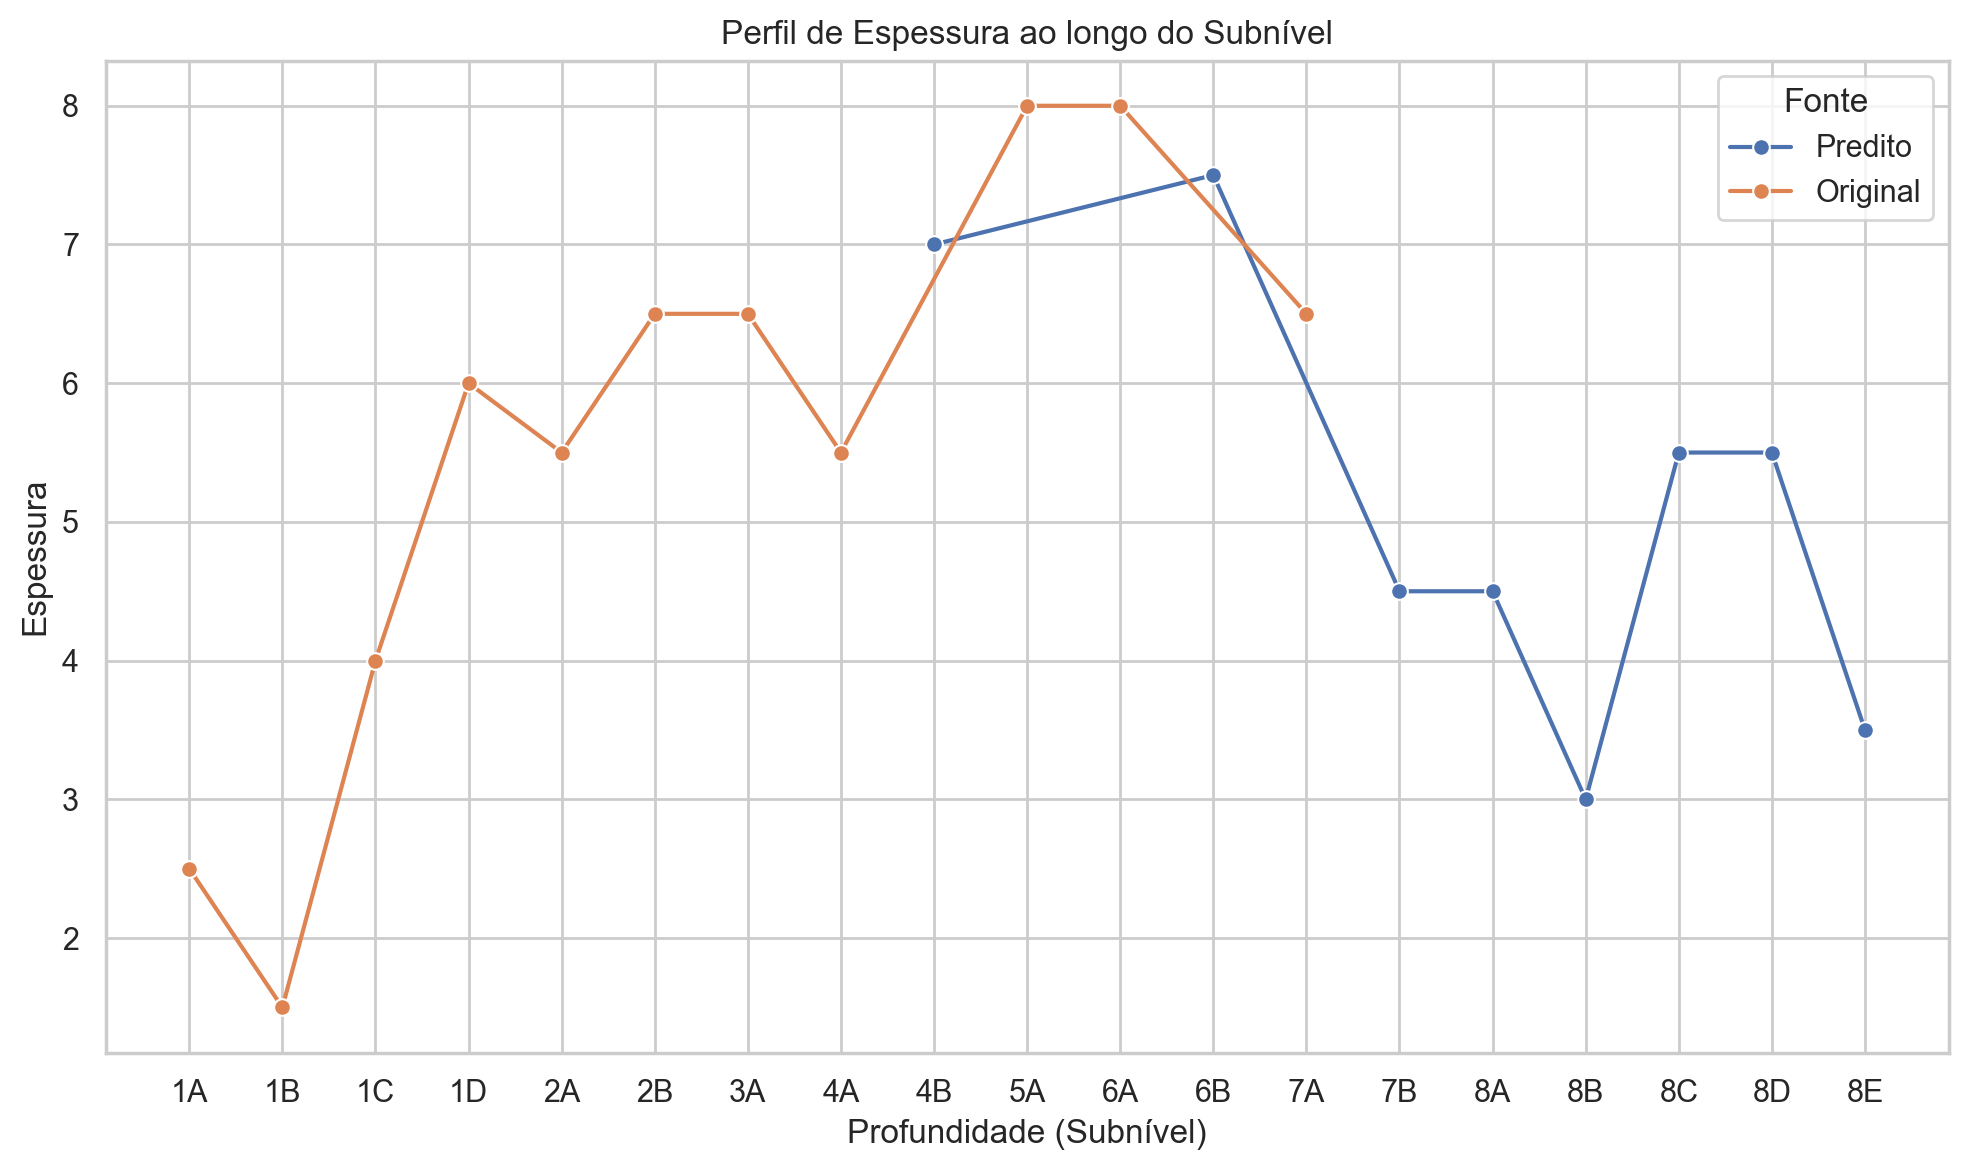

In [6]:
# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="U/Th", hue="Fonte", marker="o")
plt.title("Perfil de U/Th ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("U/Th")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="Fe2O3", hue="Fonte", marker="o")
plt.title("Perfil de Fe2O3 ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("Fe2O3")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="Al2O3", hue="Fonte", marker="o")
plt.title("Perfil de Al2O3 ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("Al2O3")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)  
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="TiO2", hue="Fonte", marker="o")
plt.title("Perfil de TiO2 ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("TiO2")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="TS", hue="Fonte", marker="o")
plt.title("Perfil de TS ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("TS")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="TOC", hue="Fonte", marker="o")
plt.title("Perfil de TOC ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("TOC")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="TN", hue="Fonte", marker="o")
plt.title("Perfil de TN ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("TN")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="MOA", hue="Fonte", marker="o")
plt.title("Perfil de MOA ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("MOA")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="MOA-NF", hue="Fonte", marker="o")
plt.title("Perfil de MOA-NF ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("MOA-NF")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="OP-AL", hue="Fonte", marker="o")
plt.title("Perfil de OP-AL ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("OP-AL")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="OP-EQUI", hue="Fonte", marker="o")
plt.title("Perfil de OP-EQUI ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")  
plt.ylabel("OP-EQUI")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="2010", hue="Fonte", marker="o")
plt.title("Perfil de 2010 ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("2010")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="2010.1", hue="Fonte", marker="o")
plt.title("Perfil de 2010.1 ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("2010.1")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="N. AMOSTRAS", hue="Fonte", marker="o")
plt.title("Perfil de N. AMOSTRAS ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("N. AMOSTRAS")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de linha: eixo x = profundidade, eixo y = teores
sns.lineplot(data=df, x="Subniveis", y="Espessura", hue="Fonte", marker="o")
plt.title("Perfil de Espessura ao longo do Subnível")
plt.xlabel("Profundidade (Subnível)")
plt.ylabel("Espessura")
plt.gca().invert_xaxis()  # Inverte o eixo X, se necessário, para profundidade aumentando da esquerda para a direita
plt.legend(title="Fonte")   
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
%pip install --upgrade nbformat
%pip install --upgrade plotly ipywidgets notebook
%pip install jupyterlab
%pip install ipywidgets plotly notebook


import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Seu DataFrame

data = {
    "Subniveis": ["8E", "8D", "8C", "8B", "8A", "7B", "7A", "6B", "6A", "5A", "4B", "4A", "3A", "2B", "2A", "1D", "1C", "1B", "1A"],
    "Espessura": [3.5, 5.5, 5.5, 3, 4.5, 4.5, 6.5, 7.5, 8, 8, 7, 5.5, 6.5, 6.5, 5.5, 6, 4, 1.5, 2.5],
    "contagem": [7, 9, 8, 17, 20, 3, 13, 15, 4, 11, 52, 25, 14, 25, 8, 14, 7, 10, 8],
    "MOA-NF": [29, 27, 62, 54, 70, 64, 71, 78, 74, 62, 75, 89, 84, 89, 79, 72, 71, 68, 69],
    "OP-AL": [4, 10, 3, 7, 3, 1, 2, 4, 3, 4, 2, 1, 0, 1, 0, 1, 2, 2, 3],
    "OP-EQUI": [2, 3, 1, 4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    "Coleta 2010": [6, 12, 12, 5, 9, 92, 30, 15, 18, 51, 125, 75, 57, 44, 20, 20, 6, 0, 0],
    "Coleta 2016": [10, 25, 25, 8, 18, 100, 71, 50, 54, 166, 150, 91, 113, 52, 40, 64, 45, 10, 0],
    "Fe2O3": [5.574, 5.706, 5.679, 5.553, 5.65, 5.663, 7.06, 6.251, 6.66, 6.41, 6.308, 5.23, 7.41, 5.99, 6.89, 5.78, 5.25, 5.52, 4.94],
    "U/Th": [1.485, 1.506, 1.472, 1.573, 1.502, 1.602, 2.06, 1.513, 1.98, 1.82, 1.772, 1.81, 1.66, 1.35, 1.28, 1.11, 1.17, 1.51, 1.48],
    "Al2O3": [13.829, 13.867, 14.018, 13.58, 14.09, 13.91, 14.13, 14.346, 14.31, 13.69, 14.0, 14.1, 13.62, 15.01, 14.65, 13.95, 14.89, 13.38, 13.12],
    "TiO2": [0.616, 0.611, 0.614, 0.611, 0.614, 0.611, 0.57, 0.594, 0.55, 0.59, 0.592, 0.61, 0.6, 0.61, 0.61, 0.62, 0.64, 0.61, 0.63],
    "MOA": [241.5, 249.6, 251.1, 231, 251.8, 256.6, 327, 303.8, 286, 248, 296.2, 258, 289, 286, 338, 321, 266, 251, 190],
    "TS": [2.596, 2.264, 2.458, 2.503, 2.739, 3.055, 1.49, 2.594, 1.96, 2.73, 2.846, 4.54, 1.71, 1.24, 1.72, 3.98, 3.67, 1.73, 2.62],
    "TOC": [11.063, 11.144, 10.645, 11.963, 10.605, 11.233, 11.93, 8.935, 12.11, 11.7, 10.66, 12.01, 13.05, 8.79, 7.69, 5.73, 7.42, 12.41, 12.97],
        "TN": [0.439, 0.443, 0.417, 0.48, 0.408, 0.43, 0.43, 0.322, 0.46, 0.44, 0.382, 0.43, 0.54, 0.32, 0.29, 0.18, 0.26, 0.52, 0.54]
    }
    

df = pd.DataFrame(data)

# df = pd.read_csv("seuarquivo.csv")

# Lista de colunas numéricas disponíveis para plotar
colunas_plotaveis = ["U/Th", "Fe2O3", "Al2O3", "TiO2", "TS", "TOC", "TN", "MOA", 
                     "MOA-NF", "OP-AL", "OP-EQUI", "Coleta 2010", "Coleta 2016", "contagem", "Espessura"]

# Dropdown widget
dropdown = widgets.Dropdown(
    options=colunas_plotaveis,
    value='U/Th',
    description='Parâmetro:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='10%', margin='100 100 0 100px', height='50%'),
    continuous_update=False
)
      

# Função para atualizar o gráfico
def atualizar_grafico(coluna):
    fig = px.line(
        df,
        x= coluna,
        y='Subniveis',
        height=1000,
        width=800, 
        markers=True,
        title=f"{coluna}"
    )
    fig.update_layout(xaxis_title='Profundidade (Subnível)', yaxis_title=coluna)
    # quero reverter o eixo y 
    fig.update_yaxes(autorange="reversed")  # Inverte o eixo Y
  
    fig.update_yaxes(tickmode='array', tickvals=df['Subniveis'], ticktext=df['Subniveis'])
    fig.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')))
    fig.update_layout(
        title_font=dict(size=20),
        xaxis_title_font=dict(size=16),
        yaxis_title_font=dict(size=16),
        legend_title_font=dict(size=16),
        font=dict(size=14)
    )
    #mudar a cor do grafico para azul 
    fig.update_traces(line=dict(color='blue'))
    # Adicionar a linha de média
    media = df[coluna].mean()
    fig.add_vline(x=media, line_width=2, line_dash="dash", line_color="red")

    #adicionar nos cantos dados de estatisticva
    fig.add_annotation(
        xref="paper", yref="paper",
        x=0.95, y=0.95,
        text=f"Média: {media:.2f}",
        showarrow=False,
        font=dict(size=16),
        bgcolor="white",
        bordercolor="black",
        borderwidth=1,
        borderpad=4
    )
    fig.add_annotation(
        xref="paper", yref="paper",
        x=0.95, y=0.90,
        text=f"Máximo: {df[coluna].max():.2f}",
        showarrow=False,
        font=dict(size=16),
        bgcolor="white",
        bordercolor="black",
        borderwidth=1,
        borderpad=4
    )
    fig.add_annotation(
        xref="paper", yref="paper",
        x=0.95, y=0.85,
        text=f"Mínimo: {df[coluna].min():.2f}",
        showarrow=False,
        font=dict(size=16),
        bgcolor="white",
        bordercolor="black",
        borderwidth=1,
        borderpad=4
    )
    
    fig.show()

# Vincular a função ao dropdown
widgets.interact(atualizar_grafico, coluna=dropdown)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


interactive(children=(Dropdown(description='Parâmetro:', layout=Layout(height='50%', margin='100 100 0 100px',…

<function __main__.atualizar_grafico(coluna)>

In [8]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
from IPython.display import HTML
from ipywidgets import HBox, VBox, Output

# Carregar o DataFrame (como você já definiu)

# Lista de colunas numéricas disponíveis
colunas_plotaveis = ["U/Th", "Fe2O3", "Al2O3", "TiO2", "TS", "TOC", "TN", "MOA", 
                     "MOA-NF", "OP-AL", "OP-EQUI", "Coleta 2010", "Coleta 2016", "contagem", "Espessura"]

# Criação dos dois dropdowns
dropdown1 = widgets.Dropdown(
    options=colunas_plotaveis,
    value='U/Th',
    description='Parâmetro 1:',
    layout=widgets.Layout(width='250px')
)

dropdown2 = widgets.Dropdown(
    options=colunas_plotaveis,
    value='Fe2O3',
    description='Parâmetro 2:',
    layout=widgets.Layout(width='250px')
)
dropdown3 = widgets.Dropdown(
    options=colunas_plotaveis,
    value='Al2O3',
    description='Parâmetro 3:',
    layout=widgets.Layout(width='250px')
)
dropdown4 = widgets.Dropdown(
    options=colunas_plotaveis,
    value='TiO2',
    description='Parâmetro 4:',
    layout=widgets.Layout(width='250px')
)

# Função para gerar um gráfico individual
def gerar_grafico(coluna, cor='blue'):
    fig = px.line(
        df,
        x=coluna,
        y='Subniveis',
        height=1000,
        width=500,
        markers=True,
        title=f"{coluna}"
    )
    fig.update_yaxes(autorange="reversed", tickmode='array', tickvals=df['Subniveis'], ticktext=df['Subniveis'])
    fig.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')), line=dict(color=cor))
    media = df[coluna].mean()
    fig.add_vline(x=media, line_width=2, line_dash="dash", line_color="red")
    fig.add_annotation(xref="paper", yref="paper", x=0.95, y=0.95, text=f"Média: {media:.2f}",
                       showarrow=False, font=dict(size=14), bgcolor="white",
                       bordercolor="black", borderwidth=1, borderpad=4)
    fig.add_annotation(xref="paper", yref="paper", x=0.95, y=0.90,
                       text=f"Máx: {df[coluna].max():.2f}", showarrow=False,
                       font=dict(size=14), bgcolor="white", bordercolor="black", borderwidth=1, borderpad=4)
    fig.add_annotation(xref="paper", yref="paper", x=0.95, y=0.85,
                       text=f"Mín: {df[coluna].min():.2f}", showarrow=False,
                       font=dict(size=14), bgcolor="white", bordercolor="black", borderwidth=1, borderpad=4)
    return fig

# Função principal para atualizar ambos os gráficos
def atualizar_graficos(col1, col2, col3, col4):
    fig1 = gerar_grafico(col1, cor='blue')
    fig2 = gerar_grafico(col2, cor='green')
    fig3 = gerar_grafico(col3, cor='purple')
    fig4 = gerar_grafico(col4, cor='orange')

# Chamar widgets e layout
ui = HBox([dropdown1, dropdown2, dropdown3, dropdown4])
output1 = Output()
output2 = Output()
output3 = Output()
output4 = Output()

display(ui)
display(HBox([output1, output2, output3, output4]))  # <- lado a lado

# Ligação interativa
def atualizar(col1, col2, col3, col4):
    with output1:
        output1.clear_output()
        fig1 = gerar_grafico(col1, cor='blue')
        fig1.show()
    with output2:
        output2.clear_output()
        fig2 = gerar_grafico(col2, cor='green')
        fig2.show()
    with output3:
        output3.clear_output()
        fig3 = gerar_grafico(col3, cor='orange')
        fig3.show() 
    with output4:
        output4.clear_output()
        fig4 = gerar_grafico(col4, cor='purple')
        fig4.show()

widgets.interactive_output(atualizar, {'col1': dropdown1, 'col2': dropdown2, 'col3': dropdown3, 'col4': dropdown4})



Output()